# **TRABAJO PRÁCTICO 2 APRENDIZAJE AUTOMÁTICO I TUIA 2024**



INTEGRANTES:

Herrera Morena (H-1187/8)

Zorzolo Rubio Juana (Z-1217/3)

En este trabajo, se tiene como objetivo predecir la probabilidad de lluvia al día siguiente en diversas ciudades de Australia, utilizando la variable 'RainTomorrow' del conjunto de datos weatherAUS.csv. Para lograr esta predicción, empleamos un conjunto de características climáticas, como la dirección y velocidad del viento, la temperatura y la humedad, entre otras.

Se utilizan técnicas de clasificación como la regresión logística y redes neuronales, además de métodos de optimización como la validación cruzada y la búsqueda de hiperparámetros. También se implementarán enfoques de regularización y explicabilidad mediante herramientas como SHAP, con el fin de mejorar la interpretación y precisión de los modelos seleccionados. El trabajo concluye con la comparación de los distintos modelos para determinar cuál ofrece el mejor rendimiento en la predicción de la variable objetivo.

Variables y Significados

- Date: Fecha de la observación meteorológica.

- Location: Nombre del lugar donde se registró la observación meteorológica.

- MinTemp: Temperatura mínima registrada durante el día (en °C).

- MaxTemp: Temperatura máxima registrada durante el día (en °C).

- Rainfall: Cantidad de lluvia registrada durante el día (en mm).

- Evaporation: Cantidad de evaporación observada durante el día (en mm).

- Sunshine: Número de horas de sol brillante durante el día.

- WindGustDir: Dirección de la ráfaga de viento más fuerte durante el día.

- WindGustSpeed: Velocidad de la ráfaga de viento más fuerte durante el día (en km/h).

- WindDir9am: Dirección del viento a las 9 a.m.

- WindDir3pm: Dirección del viento a las 3 p.m.

- WindSpeed9am: Velocidad del viento a las 9 a.m. (en km/h).

- WindSpeed3pm: Velocidad del viento a las 3 p.m. (en km/h).

- Humidity9am: Humedad relativa a las 9 a.m. (en porcentaje).

- Humidity3pm: Humedad relativa a las 3 p.m. (en porcentaje).

- Pressure9am: Presión atmosférica a las 9 a.m. (en hPa).

- Pressure3pm: Presión atmosférica a las 3 p.m. (en hPa).

- Cloud9am: Cobertura de nubes a las 9 a.m. (medido en oktas, una unidad de cobertura nubosa).

- Cloud3pm: Cobertura de nubes a las 3 p.m. (medido en oktas).

- Temp9am: Temperatura a las 9 a.m. (en °C).

- Temp3pm: Temperatura a las 3 p.m. (en °C).

- RainToday: Indica si llovió hoy (Sí/No).

- RainTomorrow: Indica si se espera que llueva mañana (Sí/No).

# Importaciones

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import joblib
import warnings
import sklearn
import imblearn
import pycaret
import shap
import optuna
import tensorflow as tf

from joblib import dump
from joblib import load
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import PowerTransformer, RobustScaler
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.datasets import fetch_california_housing, load_breast_cancer, load_wine
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from pycaret.classification import *

#!pip install shap;
import shap
#!pip install --quiet optuna

import optuna
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping


In [118]:
shap.initjs()

In [119]:
libraries = {
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": sns.__version__,
    "joblib": joblib.__version__,
    "scikit-learn": sklearn.__version__,
    "imblearn": imblearn.__version__,
    "pycaret": pycaret.__version__,
    "shap": shap.__version__,
    "optuna": optuna.__version__,
    "tensorflow": tf.__version__,
}

print("Versiones de librerías:")
for lib, version in libraries.items():
    print(f"{lib}=={version}")

Versiones de librerías:
pandas==2.1.4
numpy==1.26.4
matplotlib==3.7.5
seaborn==0.13.2
joblib==1.3.2
scikit-learn==1.4.2
imblearn==0.12.4
pycaret==3.3.2
shap==0.46.0
optuna==4.1.0
tensorflow==2.18.0


# Carga de datos

In [120]:
!gdown "12Cu0b2V5ggyQPBlE9DbV8MC3PS8nC5IO" --output "weatherAUS.csv"

"gdown" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [121]:
df_weather = pd.read_csv('weatherAUS.csv')
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [122]:
# Seleccionar 10 ciudades aleatorias con random_state para siempre obtener los mismos resultados
ciudades_aleatorias = df_weather['Location'].sample(n=10, random_state=42)
df_weather = df_weather[df_weather['Location'].isin(ciudades_aleatorias)]
df_weather['Location'].value_counts()

Location
Sydney          3344
Melbourne       3193
Albury          3040
Wollongong      3040
GoldCoast       3040
MountGambier    3040
Richmond        3009
PerthAirport    3009
Name: count, dtype: int64

## Información general

Se observa, en términos generales, información del data para así tener una vaga idea de las posibles decisiones que se tomarán posteriormente.

In [123]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24180.000000,24184.000000,23736.000000,13745.000000,12121.000000,23310.000000,24552.000000,24571.000000,24095.000000,24094.000000,24125.000000,24144.000000,14111.000000,14229.000000,24148.000000,24141.000000
mean,12.698023,22.958200,2.582685,4.840800,7.227630,41.324410,15.122149,20.275202,69.369911,53.825724,1018.126006,1015.779825,4.944795,4.813480,17.100538,21.433317
std,5.542904,6.060849,8.658253,3.400684,3.877842,14.627816,9.793927,9.447507,17.237774,19.043083,7.071843,6.953582,2.821377,2.733128,5.608510,5.863250
min,-4.800000,6.800000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,9.000000,4.000000,985.100000,982.900000,0.000000,0.000000,0.300000,5.300000
25%,8.800000,18.500000,0.000000,2.200000,4.200000,31.000000,7.000000,13.000000,58.000000,40.000000,1013.400000,1011.100000,2.000000,2.000000,13.000000,17.200000
50%,12.700000,22.500000,0.000000,4.000000,7.800000,39.000000,13.000000,20.000000,70.000000,54.000000,1018.200000,1015.800000,6.000000,6.000000,17.100000,21.000000
75%,17.000000,26.900000,1.000000,6.800000,10.300000,50.000000,20.000000,26.000000,82.000000,67.000000,1022.900000,1020.500000,7.000000,7.000000,21.200000,25.100000
max,28.600000,47.000000,192.000000,37.200000,14.300000,126.000000,87.000000,87.000000,100.000000,100.000000,1039.900000,1037.800000,9.000000,8.000000,39.400000,45.900000


In [124]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24715 entries, 0 to 120637
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24715 non-null  object 
 1   Location       24715 non-null  object 
 2   MinTemp        24180 non-null  float64
 3   MaxTemp        24184 non-null  float64
 4   Rainfall       23736 non-null  float64
 5   Evaporation    13745 non-null  float64
 6   Sunshine       12121 non-null  float64
 7   WindGustDir    23307 non-null  object 
 8   WindGustSpeed  23310 non-null  float64
 9   WindDir9am     22917 non-null  object 
 10  WindDir3pm     24414 non-null  object 
 11  WindSpeed9am   24552 non-null  float64
 12  WindSpeed3pm   24571 non-null  float64
 13  Humidity9am    24095 non-null  float64
 14  Humidity3pm    24094 non-null  float64
 15  Pressure9am    24125 non-null  float64
 16  Pressure3pm    24144 non-null  float64
 17  Cloud9am       14111 non-null  float64
 18  Cloud3pm  

# Codificación de Variables categóricas

## 'RainToday' y 'RainTomorrow'

In [125]:
df_weather.loc[:, 'RainToday'] = df_weather['RainToday'].map({'Yes': 1, 'No': 0})
df_weather.loc[:, 'RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

# Ordenar las filas del data según Date
df_weather = df_weather.sort_values(by='Date')

## 'WindGustDir', 'WindDir9am' y 'WindDir3pm'

La conversión de variables cualitativas mediante One-Hot Encoding (get_dummies()) puede generar un gran número de nuevas variables. Esto puede llevar a un incremento en la dimensionalidad del dataset, por loq ue podría complejizar el modelo.

De esta manera, se decide ver la influencia de las variables 'WindGustDir', 'WindDir9am' y 'WindDir3pm' en la target para saber si su codificación es redundante o no. Basado en los resultados se decidirá continuar con el proceso de codificación o eliminarlas para evitar posibles dificultades.

In [126]:
cuantitativas = df_weather.select_dtypes(include=['float64', 'int64'])

# Aplicar One-Hot Encoding para las columnas categóricas
df_sin_location = df_weather.drop(columns=['Location'])
df_codificado = pd.get_dummies(df_sin_location, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

df_combinado = pd.concat([cuantitativas, df_codificado.drop(columns=cuantitativas.columns)], axis=1)

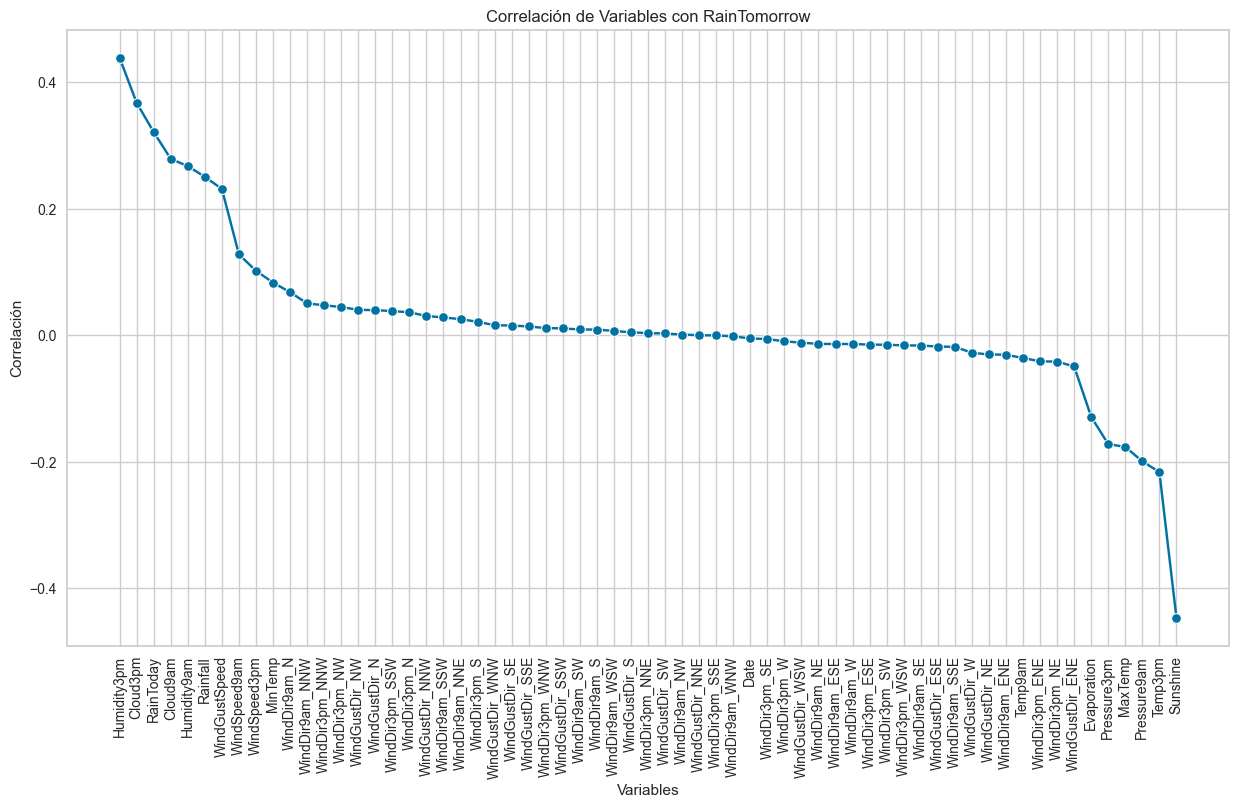

In [127]:
# Calcular las correlaciones de cada variable con 'RainTomorrow'
correlaciones = df_combinado.corrwith(df_combinado['RainTomorrow']).sort_values(ascending=False)
correlaciones = correlaciones.drop('RainTomorrow')

plt.figure(figsize=(15, 8))
sns.lineplot(x=correlaciones.index, y=correlaciones.values, marker='o', color='b')
plt.xticks(rotation=90)
plt.title('Correlación de Variables con RainTomorrow')
plt.ylabel('Correlación')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

En específico, las variables codificadas ('WindGustDir', 'WindDir9am' y 'WindDir3pm') no aportan valor predictivo significativo a la target. De esta manera, se eliminan para evitar complicaciones innecesarias en el modelo.



In [128]:
df_weather = df_weather.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [129]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


# Análisis Descriptivo

Se realiza el análisis descriptivo previo a la limpieza de datos ya que ayuda a entender mejor el conjunto de datos. Este análisis permite identificar patrones y problemas, y a su vez, facilita la toma de decisiones en las siguientes etapas del procesamiento de datos.

## Matriz de correlación

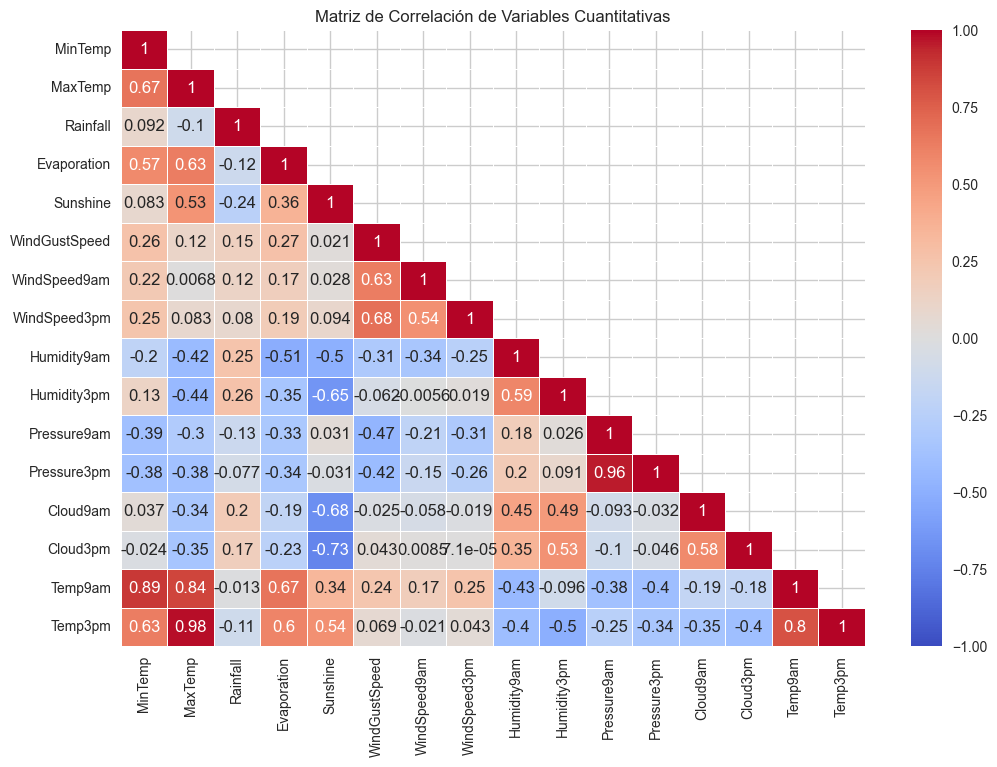

In [130]:
cuantitativas = df_weather.select_dtypes(include=['float64', 'int64'])
corr_matrix = cuantitativas.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

A continuación y dada la matriz de correlación, se observa en detalle con un scatterplot la relación entre las variables que presentan una correlación lineal inversa o directa más fuerte.

## Relación entre Temp3pm y MaxTemp

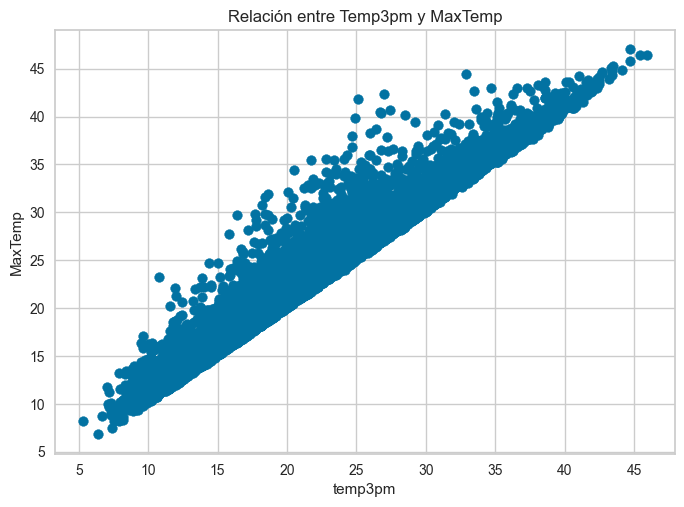

In [131]:
plt.scatter(df_weather['Temp3pm'], df_weather['MaxTemp'])
plt.xlabel('temp3pm')
plt.ylabel('MaxTemp')
plt.title('Relación entre Temp3pm y MaxTemp')
plt.show()

## Relación entre Temp9am y MinTemp

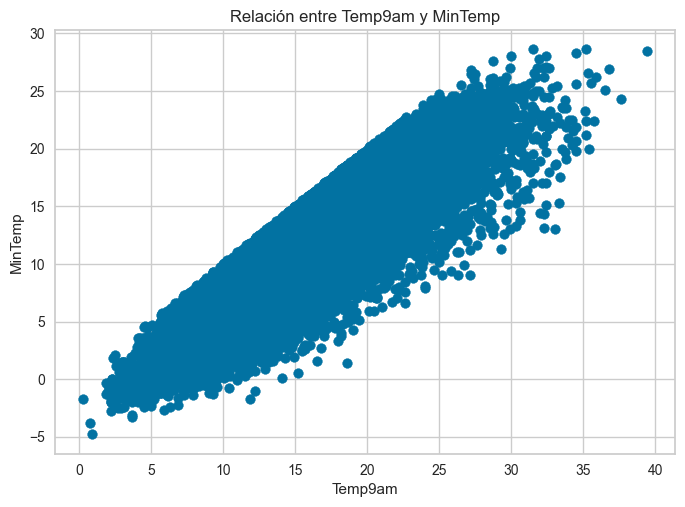

In [132]:
plt.scatter(df_weather['Temp9am'], df_weather['MinTemp'])
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.title('Relación entre Temp9am y MinTemp')
plt.show()

## Relación entre Pressure3pm y Pressure9am

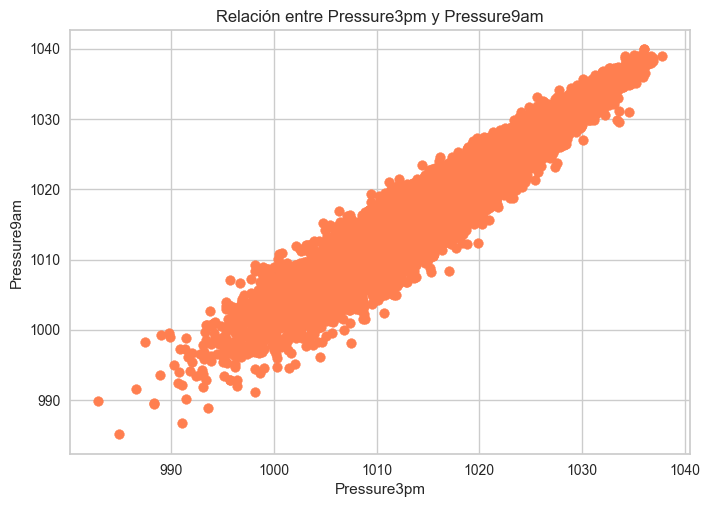

In [133]:
plt.scatter(df_weather['Pressure3pm'], df_weather['Pressure9am'], color='coral')
plt.xlabel('Pressure3pm')
plt.ylabel('Pressure9am')
plt.title('Relación entre Pressure3pm y Pressure9am')
plt.show()

Conclusión: Todos los gráficos muestran una correlación positiva entre las dos variables seleccionadas, con una ligera dispersión en ciertos puntos, lo cual podría ser un área interesante para investigar con mayor profundidad, como por ejemplo si esos puntos corresponden a días con condiciones climáticas atípicas.

## humidity3pm según raintomorrow

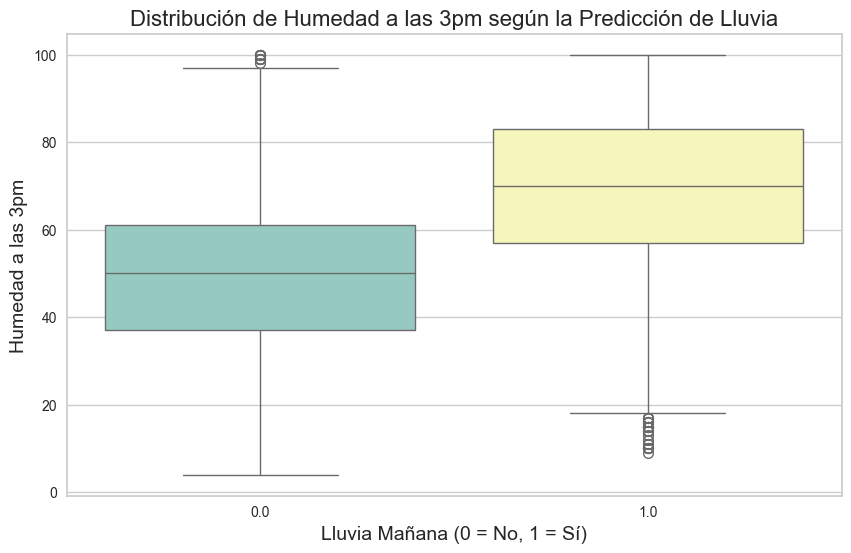

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df_weather, palette='Set3')
plt.title('Distribución de Humedad a las 3pm según la Predicción de Lluvia', fontsize=16)
plt.xlabel('Lluvia Mañana (0 = No, 1 = Sí)', fontsize=14)
plt.ylabel('Humedad a las 3pm', fontsize=14)
plt.show()

Conclusión: Se observa que la humedad a las 3pm influencia si lloverá o no. Llueve con mayor presencia de humedad.

# Eliminar Filas NaN

Respecto a los valores nulos, la primer decisión es eliminar las filas que contengan más del 70% de variables con valores faltantes, ya que se considera que contienen información insuficiente o poco representativa para realizar un análisis adecuado.

Mantener estas filas podría generar ruido en el modelo, afectando negativamente la calidad de las predicciones.

In [135]:
filas_nan = df_weather[df_weather.isna().sum(axis=1) > 15]
q_filas_nan = len(filas_nan)
df_weather = df_weather.dropna(thresh=df_weather.shape[1] - 15)

# Partición de datos

Se separan las variables independientes (X) de la variable dependiente (y), que en este trabajo es la variable RainTomorrow.

In [136]:
X = df_weather.drop("RainTomorrow", axis=1)
y = df_weather["RainTomorrow"]

Los datos se dividen en TRAIN y TEST, fundamental para poder entrenar el modelo y luego testearlo.

80% para entrenamiento y el 20% restante para prueba.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19763, 19), (4941, 19), (19763,), (4941,))

In [139]:
# Combinar los datas de entrenamiento y los de testeo para mayor facilidad al momento de trabajarlos
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Limpieza de datos

Para df_test, se aplicaron los mismos métodos y decisiones utilizados para df_train.

## Valores Nulos

### Para df_train

Se imputan los valores faltantes:

- A las variables categóricas con la moda.

- Al resto de las variables con la mediana ya que es una medida más robusta.

In [141]:
# Crear imputadores para columnas categóricas
imputer_categoricas = SimpleImputer(strategy='most_frequent')
imputer_categoricas.fit(df_train[['RainToday', 'RainTomorrow']])

# Transformar los datos (aplicación del imputador)
df_train[['RainToday', 'RainTomorrow']] = imputer_categoricas.transform(df_train[['RainToday', 'RainTomorrow']])

In [143]:
imputer = SimpleImputer(strategy='median')
df_train[df_train.select_dtypes(include=['float64']).columns] = imputer.fit_transform(df_train.select_dtypes(include=['float64']))

Confirmar los cambios realizados:

In [144]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19763 entries, 151 to 33388
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19763 non-null  datetime64[ns]
 1   Location       19763 non-null  object        
 2   MinTemp        19763 non-null  float64       
 3   MaxTemp        19763 non-null  float64       
 4   Rainfall       19763 non-null  float64       
 5   Evaporation    19763 non-null  float64       
 6   Sunshine       19763 non-null  float64       
 7   WindGustSpeed  19763 non-null  float64       
 8   WindSpeed9am   19763 non-null  float64       
 9   WindSpeed3pm   19763 non-null  float64       
 10  Humidity9am    19763 non-null  float64       
 11  Humidity3pm    19763 non-null  float64       
 12  Pressure9am    19763 non-null  float64       
 13  Pressure3pm    19763 non-null  float64       
 14  Cloud9am       19763 non-null  float64       
 15  Cloud3pm       19763 n

### Para df_test

In [146]:
# Transformar los datos (aplicación del imputador)
df_test[['RainToday', 'RainTomorrow']] = imputer_categoricas.transform(df_test[['RainToday', 'RainTomorrow']])

In [148]:
df_test[df_test.select_dtypes(include=['float64']).columns] = imputer.transform(df_test.select_dtypes(include=['float64']))

Confirmar los cambios realizados:

In [149]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4941 entries, 31098 to 28972
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4941 non-null   datetime64[ns]
 1   Location       4941 non-null   object        
 2   MinTemp        4941 non-null   float64       
 3   MaxTemp        4941 non-null   float64       
 4   Rainfall       4941 non-null   float64       
 5   Evaporation    4941 non-null   float64       
 6   Sunshine       4941 non-null   float64       
 7   WindGustSpeed  4941 non-null   float64       
 8   WindSpeed9am   4941 non-null   float64       
 9   WindSpeed3pm   4941 non-null   float64       
 10  Humidity9am    4941 non-null   float64       
 11  Humidity3pm    4941 non-null   float64       
 12  Pressure9am    4941 non-null   float64       
 13  Pressure3pm    4941 non-null   float64       
 14  Cloud9am       4941 non-null   float64       
 15  Cloud3pm       4941 n

## Valores Atípicos

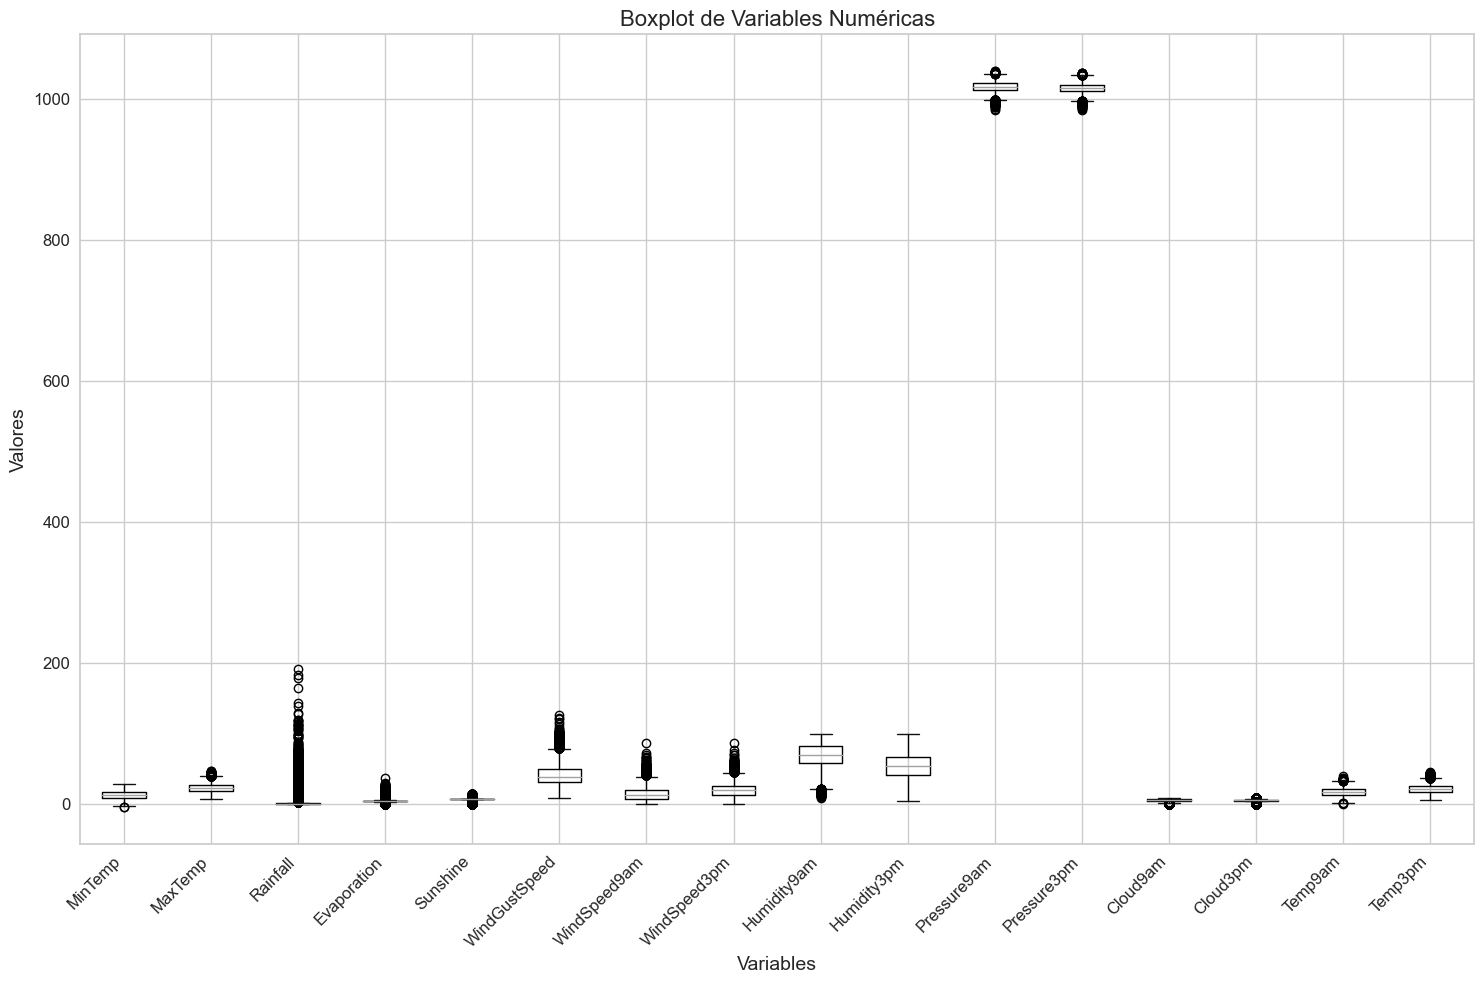

In [150]:
df_train.boxplot(figsize=(15, 10))
plt.title("Boxplot de Variables Numéricas", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.tight_layout()
plt.show()

Teniendo en cuenta el boxplot, se grafican las variables con mayor cantidad de valores atípicos para comprender si el origen de estos se debe a algún otro factor.

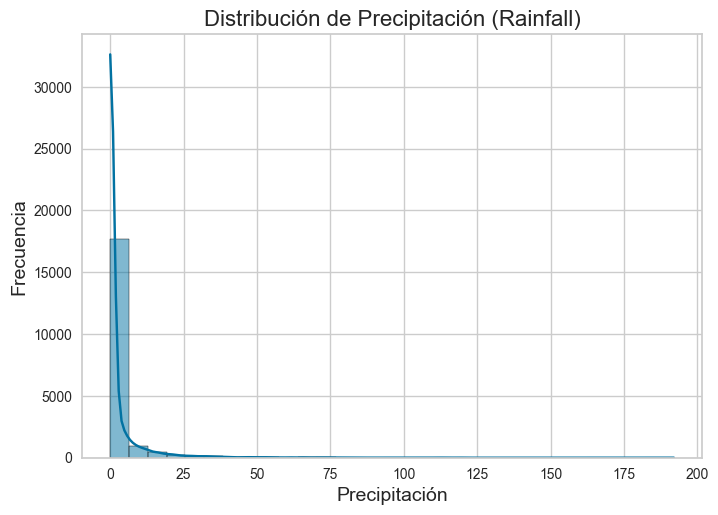

In [151]:
sns.histplot(df_train['Rainfall'], bins=30, kde=True)
plt.title('Distribución de Precipitación (Rainfall)', fontsize=16)
plt.xlabel('Precipitación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

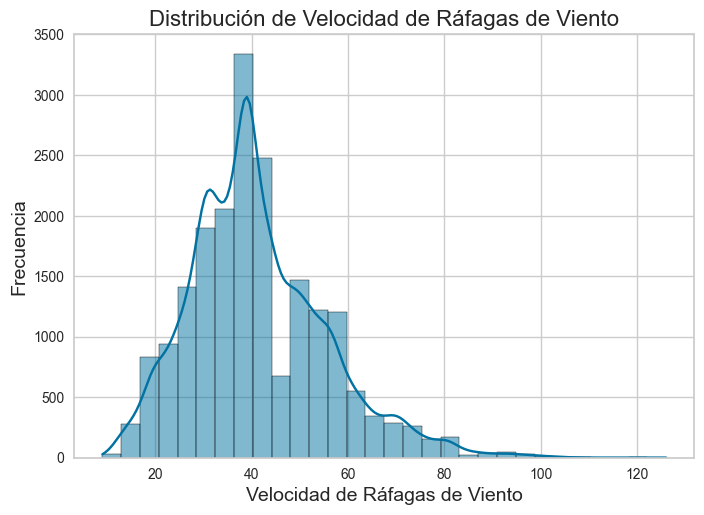

In [152]:
sns.histplot(df_train['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribución de Velocidad de Ráfagas de Viento', fontsize=16)
plt.xlabel('Velocidad de Ráfagas de Viento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

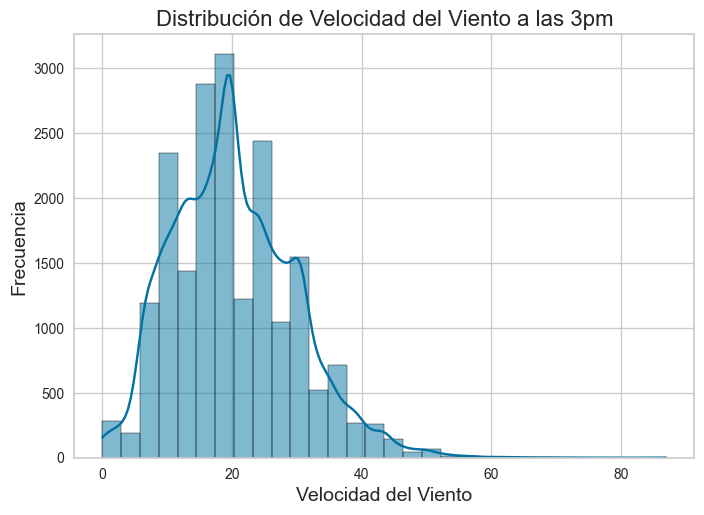

In [153]:
sns.histplot(df_train['WindSpeed3pm'], bins=30, kde=True)
plt.title('Distribución de Velocidad del Viento a las 3pm', fontsize=16)
plt.xlabel('Velocidad del Viento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

Conclusión: Se observa que los outliers se deben a una asimetría en la distribución de las variables. De esta manera, no se realiza ningún tratamiento de outliers ya que no se considera necesario. Además, eliminarlos o ajustarlos podría distorsionar la interpretación real de los datos.

## Escalado de datos

### Para df_train

In [154]:
# Se escalan las variables cuantitativas excluyendo 'RainTomorrow' y 'RainToday'
float_columns = df_train.select_dtypes(include=['float64']).columns
columns_to_scale = [col for col in float_columns if col not in ['RainTomorrow', 'RainToday']]

scaler = RobustScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

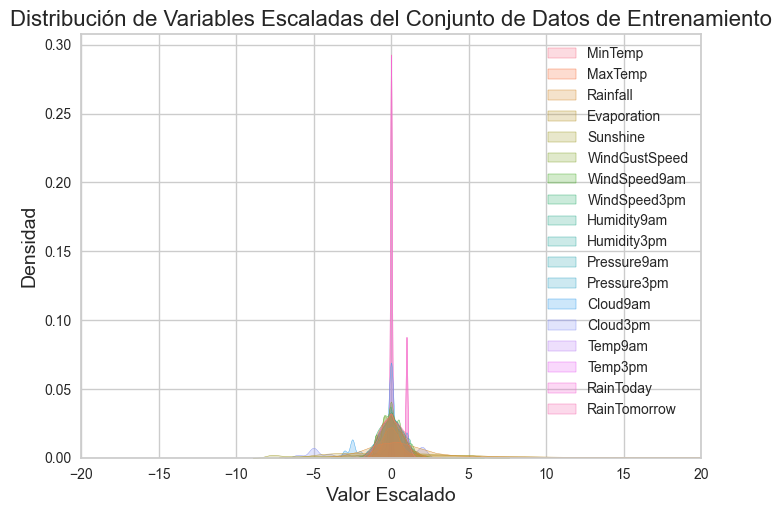

In [155]:
sns.kdeplot(data=df_train, fill=True)
plt.xlim(-20, 20)
plt.title('Distribución de Variables Escaladas del Conjunto de Datos de Entrenamiento', fontsize=16)
plt.xlabel('Valor Escalado', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

### Para df_test

In [156]:
float_columns = df_test.select_dtypes(include=['float64']).columns
columns_to_scale = [col for col in float_columns if col not in ['RainTomorrow', 'RainToday']]

df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

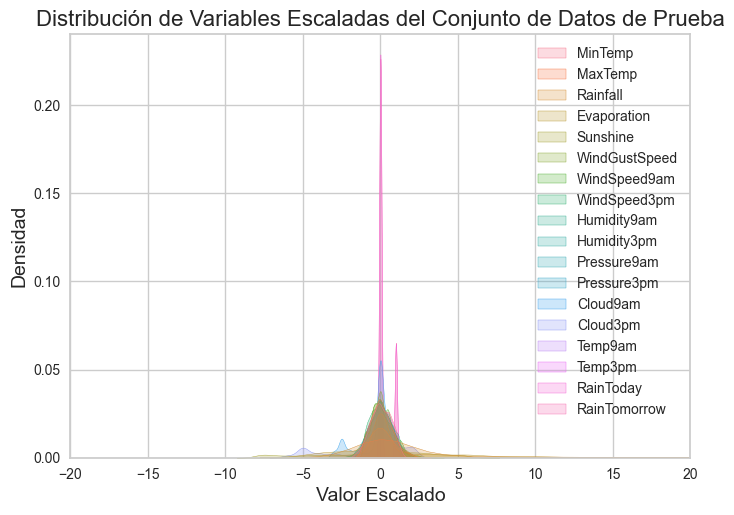

In [157]:
sns.kdeplot(data=df_test, fill=True)
plt.xlim(-20, 20)
plt.title('Distribución de Variables Escaladas del Conjunto de Datos de Prueba', fontsize=16)
plt.xlabel('Valor Escalado', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

# Balanceo del dataset (en variable target)

In [38]:
# Separar variables dependientes de independientes tanto para el data de entrenamiento como para el de prueba
X_train = df_train.drop(columns='RainTomorrow')
y_train = df_train['RainTomorrow']

X_test = df_test.drop(columns='RainTomorrow')
y_test = df_test['RainTomorrow']

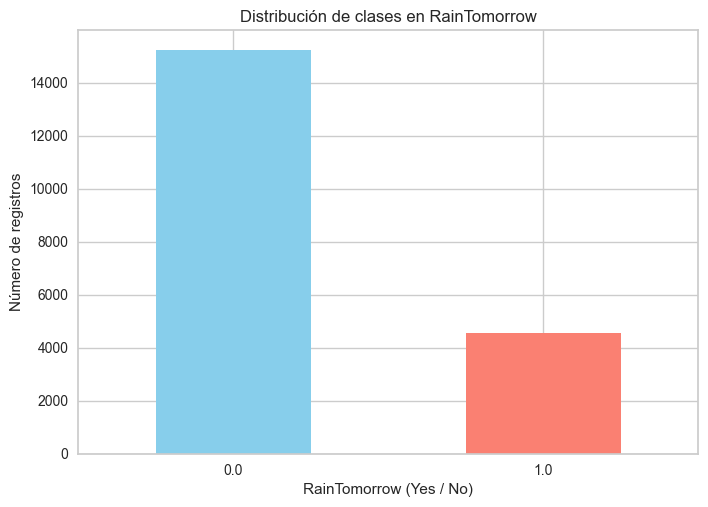

RainTomorrow
0.0    15214
1.0     4549
Name: count, dtype: int64


In [39]:
# Visuaizar la distribucion de clases
rain_tomorrow_counts = y_train.value_counts()

rain_tomorrow_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clases en RainTomorrow')
plt.ylabel('Número de registros')
plt.xlabel('RainTomorrow (Yes / No)')
plt.xticks(rotation=0)
plt.show()

print(rain_tomorrow_counts)

Conclusión: El gráfico muestra un claro desbalance en la variable objetivo RainTomorrow. Aproximadamente el 77% de los días no llueve (0), mientras que el 23% de los días sí llueve (1). Este desbalance puede afectar negativamente el rendimiento de un modelo predictivo, ya que el modelo podría sesgarse hacia predecir mayoritariamente "No". Para abordar este problema, se utilizan técnicas como el ajuste de pesos de clase, sobremuestreo o submuestreo. En este caso particular, se elige Smote.

## SMOTE

In [40]:
# Eliminar columnas no cuantitativas
X_train = X_train.drop(columns=['Date', 'Location'])
X_test = X_test.drop(columns=['Date', 'Location'])

# Aplicar Smote para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución original de la clase target:", y_train.value_counts())
print("Distribución después de SMOTE:", y_train_resampled.value_counts())

Distribución original de la clase target: RainTomorrow
0.0    15214
1.0     4549
Name: count, dtype: int64
Distribución después de SMOTE: RainTomorrow
0.0    15214
1.0    15214
Name: count, dtype: int64


Conclusión:

La distribución original de la target eran 15214 instancias de la clase 0 y 4549 de la clase 1, donde la clase 0 era mucho más dominante que la clase 1.

Luego de aplicar SMOTE, el balance de clases se justó significativamente.
Ahora, son 15214 instancias para ambas clases. El proceso se basa en generar instancias sintéticas de la clase minoritaria (1) para igualar a las de la clase mayoritaria (0).

In [41]:
X_train_resampled.shape, y_train_resampled.shape, X_test.shape, y_test.shape

((30428, 17), (30428,), (4941, 17), (4941,))

# Funciones

Las siguientes funciones son para un mejor flujo de trabajo y optimización del código.

In [42]:
metricas_df = pd.DataFrame(columns=[
  "Modelo", "Accuracy", "Precisión Clase 0", "Recall Clase 0", "F1 Clase 0",
  "Precisión Clase 1", "Recall Clase 1", "F1 Clase 1", "AUC ROC Clase 1", "Accuracy K-Fold Promedio"
])

def calcular_kfold_y_metricas(y_test, y_pred, y_proba, modelo_nombre, modelo, metricas_df, X_train, X_test, y_train):
  # Calcular accuracy promedio con validación cruzada
  cv = StratifiedKFold(n_splits=5)
  X = pd.concat([X_train, X_test])
  y = pd.concat([y_train, y_test])

  accuracy_kfold_scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
  accuracy_kfold_mean = accuracy_kfold_scores.mean()

  # Calcular métricas
  accuracy = accuracy_score(y_test, y_pred)

  precision_0 = precision_score(y_test, y_pred, pos_label=0)
  recall_0 = recall_score(y_test, y_pred, pos_label=0)
  f1_0 = f1_score(y_test, y_pred, pos_label=0)

  precision_1 = precision_score(y_test, y_pred, pos_label=1)
  recall_1 = recall_score(y_test, y_pred, pos_label=1)
  f1_1 = f1_score(y_test, y_pred, pos_label=1)

  # Calcular AUC
  auc_value = roc_auc_score(y_test, y_proba)

  # Calcular matriz de confusión
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()

  # DataFrame con todas las métricas del modelo
  resultados = pd.DataFrame([{
    "Modelo": modelo_nombre,
    "Accuracy": accuracy,
    "Precisión Clase 0": precision_0,
    "Recall Clase 0": recall_0,
    "F1 Clase 0": f1_0,
    "Precisión Clase 1": precision_1,
    "Recall Clase 1": recall_1,
    "F1 Clase 1": f1_1,
    "AUC ROC Clase 1": auc_value,
    "TN": tn,
    "FP": fp,
    "FN": fn,
    "TP": tp,
    "Accuracy K-Fold Promedio": accuracy_kfold_mean
  }])

  metricas_df = pd.concat([metricas_df, resultados], ignore_index=True)

  # Mostrar metricas
  print(f"Precisión general (Accuracy): {accuracy:.4f}")
  print(f"Promedio de Accuracy en K-Fold: {accuracy_kfold_mean:.4f}")
  print("\nClase 0.0:")
  print(f"  Precisión: {precision_0:.4f}")
  print(f"  Recall: {recall_0:.4f}")
  print(f"  F1-score: {f1_0:.4f}")
  print("\nClase 1.0:")
  print(f"  Precisión: {precision_1:.4f}")
  print(f"  Recall: {recall_1:.4f}")
  print(f"  F1-score: {f1_1:.4f}")

  return auc_value, metricas_df

In [43]:
def plot_confusion_matrix(cm):
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Matriz de Confusión')
  plt.colorbar()
  tick_marks = np.arange(2)
  thresh = cm.max() / 2.
  for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('Etiqueta Verdadera')
  plt.xlabel('Etiqueta Predicha')
  plt.tight_layout()
  plt.show()

In [44]:
def graficar_roc_auc(y_test, y_proba, auc_value, best_threshold, best_f1):
  # Calcular mejor umbral
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)

  for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1:
      best_f1 = f1
      best_threshold = threshold

  # Graficar la curva ROC
  plt.figure(figsize=(10, 6))
  plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_value:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

  print(f"Mejor umbral: {best_threshold:.2f}")

# Regresión Logística con Data Desbalanceado

In [45]:
# Modelo de regresión logística
model_desbalanceado = LogisticRegression(random_state=42, max_iter=1000)
model_desbalanceado.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_desbalanceado = model_desbalanceado.predict(X_test)
y_proba_desbalanceado = model_desbalanceado.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

In [46]:
y_train = y_train.drop(columns=['Date', 'Location'])
auc_value_desbalanceado, metricas_df = calcular_kfold_y_metricas(y_test, y_pred_desbalanceado, y_proba_desbalanceado, "RL DESBALANCED", model_desbalanceado, metricas_df, X_train, X_test, y_train)

Precisión general (Accuracy): 0.8387
Promedio de Accuracy en K-Fold: 0.8420

Clase 0.0:
  Precisión: 0.8598
  Recall: 0.9466
  F1-score: 0.9011

Clase 1.0:
  Precisión: 0.7145
  Recall: 0.4643
  F1-score: 0.5628


In [47]:
metricas_df.head()

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.8393,0.842009,3631.0,205.0,592.0,513.0


Conclusión:

1. Métrica General
- Accuracy 0.84: El modelo predice correctamente en el 84% de los casos, lo que indica un buen rendimiento general.

2. Métricas por Clase:

-- Clase 0.0: No lloverá

- Precisión 0.86: De todas las veces que el modelo predijo que no lloverá, acertó el 86%. Pocos falsos positivos.

- Recall 0.95: De todas las veces que efectivamente no llovió, el modelo acertó en el 95%. El modelo identifica correctamente casi todos los días en los que no llueve.

- F1-score 0.90: Buen balance entre precisión (0.86) y recall (0.95), lo que indica que el modelo es efectivo en predecir los días en que no llueve.

-- Clase 1.0: Lloverá

- Precisión 0.71: De todas las veces que el modelo predijo lluvia, acertó el 71%.

- Recall 0.46: De todas las veces que efectivamente llovió, el modelo acertó en el 46%. Muchos falsos positivos por lo que no se predice bien los días qeu efectivamente llovieron.

- F1-score 0.56: Indica un desequilibrio entre precisión (0.71) y recall (0.46) para la predicción de lluvia. Aunque la precisión es razonablemente alta, el bajo recall limita el rendimiento en la identificación de los días lluviosos.

3. Análisis General

En resumen, el modelo tiene un buen rendimiento general con un accuracy de 0.84, destacándose especialmente en la predicción de días sin lluvia (Clase 0.0), donde tiene una alta precisión y recall.

Sin embargo, presenta dificultades para predecir días lluviosos (Clase 1.0), con una precisión moderada y un recall relativamente bajo. El modelo necesita mejorar en la detección de lluvia, ajustando sus parámetros o utilizando técnicas adicionales para equilibrar mejor las predicciones entre las dos clases.

## Matriz de confusión

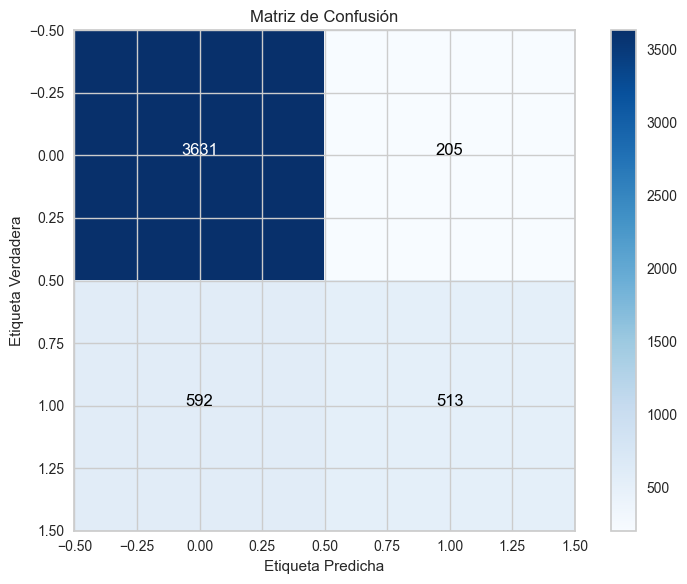

In [48]:
cm_desbalanceado = confusion_matrix(y_test, y_pred_desbalanceado)
plot_confusion_matrix(cm_desbalanceado)

Conclusión:

- Verdaderos Negativos (TN) = 3631: El modelo predijo correctamente que no llovería en 3631 ocasiones.

- Falsos Positivos (FP) = 205: El modelo predijo lluvia, pero no llovió en 205 casos.

- Falsos Negativos (FN) = 592: El modelo predijo que no llovería, pero en realidad sí llovió en 592 ocasiones.

- Verdaderos Positivos (TP) = 513: El modelo predijo correctamente que llovería en 513 ocasiones.

## AUC-ROC

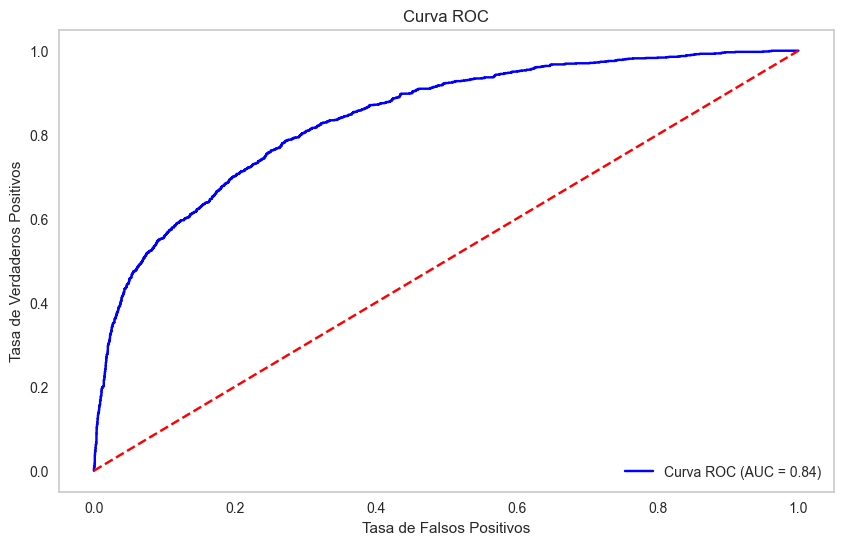

Mejor umbral: 0.36


In [49]:
graficar_roc_auc(y_test, y_proba_desbalanceado, auc_value_desbalanceado, 0.5, 0)

El AUC (Área bajo la curva) es de 0.84, lo que sugiere un buen rendimiento del modelo en general, ya que un AUC cercano a 1 indica un buen modelo.

Mejor Umbral: 0.36

Este valor representa el umbral de probabilidad al clasificar según la clase. Si el modelo predice que la probabilidad de que llueva mañana es 0.36 o más, se clasifica como (1); si es menos de 0.36, se clasifica como (0).

# Regresión Logística con Data Balanceado

In [50]:
# Modelo de regresión logística
model_balanceado = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_balanceado.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba
y_pred_balanceado = model_balanceado.predict(X_test)
y_proba_balanceado = model_balanceado.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

In [51]:
auc_value_balanceado, metricas_df = calcular_kfold_y_metricas(y_test, y_pred_balanceado, y_proba_balanceado, "RL BALANCED", model_balanceado, metricas_df, X_train_resampled, X_test, y_train_resampled)

Precisión general (Accuracy): 0.7658
Promedio de Accuracy en K-Fold: 0.7728

Clase 0.0:
  Precisión: 0.9070
  Recall: 0.7782
  F1-score: 0.8377

Clase 1.0:
  Precisión: 0.4842
  Recall: 0.7231
  F1-score: 0.5800


In [52]:
metricas_df.head()

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772795,2985.0,851.0,306.0,799.0


Conclusión:
1. Métrica General

- Accuracy 0.77: El modelo predice correctamente si va a llover o no en el 77% de las veces.

2. Métricas por Clase:

**-- Clase 0.0: No lloverá**

- Precisión 0.91: De todas las veces que el modelo predijo que no lloverá, acertó el 91% de las veces. Pocos falsos positivos.

- Recall 0.78: De todas las veces que efectivamente no llovió, el modelo acertó en el 78%. Presencia de falsos negativos, es decir que no se identifican correctamente todos los dias donde no llovió

- F1-score 0.84: Indica que el modelo tiene un buen balance entre precisión (0.91) y recall (0.78) para identificar los días en que no llueve. Esto implica que no comete muchos errores al predecir que no va a llover y también cubre bien los casos en los que realmente no llueve.

**-- Clase 1.0: Lloverá**

- Precisión 0.48: De todas las veces que el modelo predijo lluvia, solo el 48% fueron predicciones correctas. Muchos falsos positivos, o sea que el modelo predice que lloverá cuando no sucede.

- Recall 0.72: De todas las veces que efectivamente llovió, el modelo acertó en el 72%. Identifica varios días lluviosos, pero no todos.

- F1-score 0.58: Indica que hay un desequilibrio entre precisión (0.48) y recall (0.72) en los días que llueve. Aunque el recall es razonablemente alto (72%), la baja precisión significa que hay bastantes falsos positivos.

3. Análisis General

En resumen, el modelo tiene un rendimiento aceptable con una precisión general del 77%, pero no es tan bueno con la predicción de días lluviosos.

## Matriz de confusión

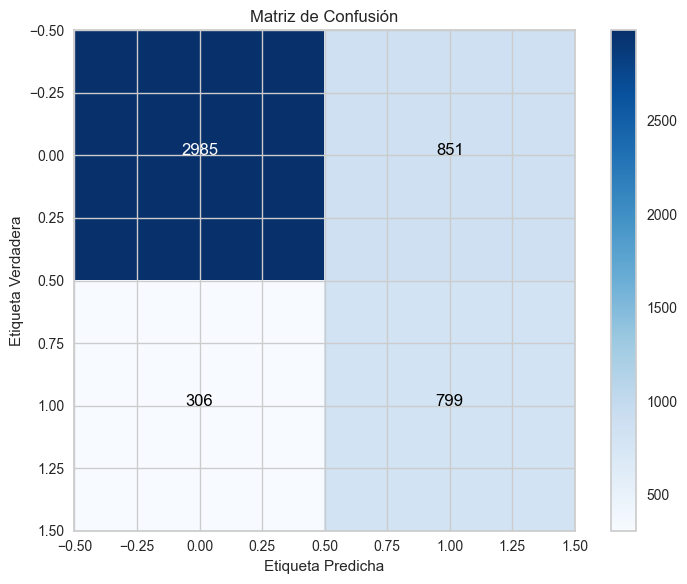

In [53]:
cm_balanceado = confusion_matrix(y_test, y_pred_balanceado)
plot_confusion_matrix(cm_balanceado)

Conclusión:

- Verdaderos Negativos (TN) = 2985: El modelo predijo correctamente que no llovería en 2985 ocasiones.

- Falsos Positivos (FP) = 851: El modelo predijo lluvia, pero no llovió en 851 casos.

- Falsos Negativos (FN) = 306: El modelo predijo que no llovería, pero en realidad sí llovió en 306 ocasiones.

- Verdaderos Positivos (TP) = 799: El modelo predijo correctamente que llovería en 799 ocasiones.

El modelo tiene un desempeño razonable en términos generales. Es bueno detectando días sin lluvia, pero tiene dificultades para predecir lluvia de manera precisa.

## AUC-ROC

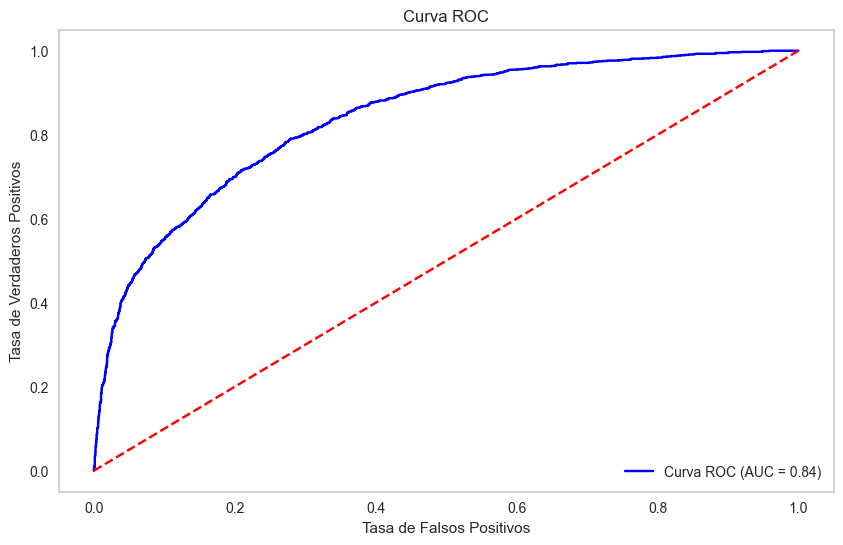

Mejor umbral: 0.58


In [54]:
graficar_roc_auc(y_test, y_proba_balanceado, auc_value_balanceado, 0.5, 0)

El AUC (Área bajo la curva) es de 0.84, lo que sugiere un buen rendimiento del modelo en general.Conclusión:

Mejor Umbral: 0.58

Si el modelo predice que la probabilidad de lluvia es 0.58 o más, se clasifica como (1); si es menos de 0.58, se clasifica como (0).

# Modelo Base

In [55]:
# Modelo base
model_base = DummyClassifier(strategy='stratified', random_state = 42)
model_base.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba
y_pred_base = model_base.predict(X_test)
y_proba_base = model_base.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

In [56]:
auc_value_base, metricas_df = calcular_kfold_y_metricas(y_test, y_pred_base, y_proba_base, "BASE", model_base, metricas_df, X_train_resampled, X_test, y_train_resampled)

Precisión general (Accuracy): 0.4882
Promedio de Accuracy en K-Fold: 0.4994

Clase 0.0:
  Precisión: 0.7649
  Recall: 0.4919
  F1-score: 0.5988

Clase 1.0:
  Precisión: 0.2122
  Recall: 0.4751
  F1-score: 0.2934


In [57]:
metricas_df.head()

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772795,2985.0,851.0,306.0,799.0
2,BASE,0.488160,0.764897,0.491919,0.598762,0.212207,0.475113,0.293378,0.483516,0.499392,1887.0,1949.0,580.0,525.0


Conclusión:
1. Métrica General

- Accuracy 0.49: El modelo predice correctamente si va a llover o no en el 49% de las veces.

2. Métricas por Clase:

**-- Clase 0.0: No lloverá**

- Precisión 0.76: De todas las veces que el modelo predijo que no lloverá, acertó el 76% de las veces. Pocos falsos positivos.

- Recall 0.49: De todas las veces que efectivamente no llovió, el modelo acertó en el 49%. Muchos falsos negativos.

- F1-score 0.60: El modelo no tiene un rendimiento sólido ni en precisión ni en recall para la clase negativa.

**-- Clase 1.0: Lloverá**

- Precisión 0.21: De todas las veces que el modelo predijo lluvia, solo el 21% fueron predicciones correctas. Muchos falsos positivos.

- Recall 0.48: De todas las veces que efectivamente llovió, el modelo acertó en el 48%. Presencia de falsos negativos.

- F1-score 0.29: El modelo tiene dificultades tanto para hacer predicciones precisas como para capturar los casos positivos.

3. Análisis General

El modelo no tiene un buen desempeño general. Modelo ineficaz.

## Matriz de confusión

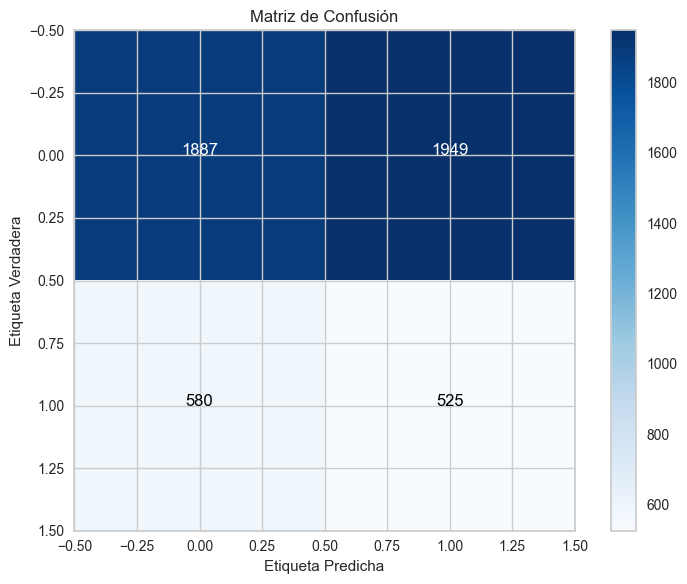

In [58]:
cm_base = confusion_matrix(y_test, y_pred_base)
plot_confusion_matrix(cm_base)

Conclusión:

- Verdaderos Negativos (TN) = 1887: El modelo predijo correctamente que no llovería en 1887 ocasiones.

- Falsos Positivos (FP) = 1949: El modelo predijo lluvia, pero no llovió en 1949 casos.

- Falsos Negativos (FN) = 580: El modelo predijo que no llovería, pero en realidad sí llovió en 580 ocasiones.

- Verdaderos Positivos (TP) = 525: El modelo predijo correctamente que llovería en 525 ocasiones.

El modelo tiene un desempeño deficiente en términos generales. Funciona razonablemente bien detectando la clase negativa (clase 0), pero muestra importantes dificultades para identificar correctamente la clase positiva (clase 1).

## AUC-ROC



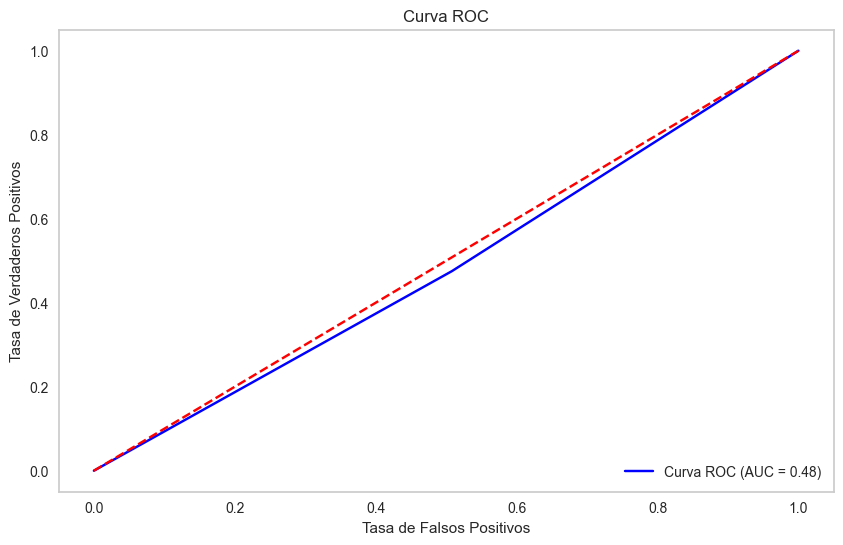

Mejor umbral: 0.00


In [59]:
graficar_roc_auc(y_test, y_proba_base, auc_value_base, 0.5, 0)

El AUC (Área bajo la curva) es de 0.48, lo que sugiere un mal rendimiento del modelo en general, practicamente no predice la clase (1).

Mejor Umbral: 0.00

Si el modelo predice que la probabilidad de lluvia es 0.00 o más, se clasifica como (1); si es menos de 0.00, se clasifica como (0).
Sin embargo, un umbral de 0.00 significa que el modelo clasifica casi todas las instancias como positivas.

# Optimización de Hiperparámetros

Luego de algunas pruebas, se utilizó optimización mediante Random Search, ya que es ideal al tener muchos parámetros y valores posibles.
Además, tiene un menor tiempo de ejecución.

Hiperparámetros elegidos:

1. Solver: Minimiza la función de pérdida.

- 'lbfgs': Para muchas características y grandes conjuntos de datos.

- 'liblinear': Para clasificación binaria y conjuntos de datos pequeños.
        
- 'saga': Para grandes conjuntos de datos. Además, es eficiente cuando los datos son dispersos.

2. C: Controla la regularización.

- Valor pequeño: Aumenta la regularización, reduce el riesgo de sobreajuste al hacer que el modelo sea más simple.

- Valor grande: Reduce la regularización, el modelo se ajusta más a los datos de entrenamiento.

3. Max_iter: Controla el número máximo de iteraciones para encontrar una solución.

- Valor bajo: El modelo podría no converger adecuadamente, lo que resulta en una solución subóptima.

- Valor alto : El modelo tiene más tiempo para converger.

4. Class_weight: Ajusta el peso de cada clase para abordar el desbalance entre clases.

- 'balanced': Si las clases están desbalanceadas, la clase minoritaria recibirá más peso para que el modelo preste más atención a ella.

- None: No se asignan pesos adicionales a las clases y el modelo no tratará de equilibrar las clases por sí mismo.

5. Penalty: Determina el tipo de regularización que se aplicará a los coeficientes del modelo.

- 'l1': Elimina las características irrelevantes llevando sus coeficientes a 0.

- 'l2': Obliga a que los coeficientes sean pequeños, ayudando a evitar el sobreajuste al hacer el modelo más simple.

- 'elasticnet': Combinación de l1 y l2.

In [60]:
def random_search(X_train, y_train, cv=5, scoring='accuracy'):
  # Posibles parámetros para regresión logística
  random_params = {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [200, 500, 1000],
    'class_weight': [None, 'balanced'],
    'penalty': ['l2', 'l1', 'elasticnet']
  }

  random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=random_params,
    cv=cv,
    scoring=scoring,
    n_jobs=-1
  )

  random_search.fit(X_train, y_train)
  return random_search.best_params_

In [61]:
# No mostrar advertencias por incompatibilidad de parámetros
warnings.filterwarnings('ignore')

best_params = random_search(X_train_resampled, y_train_resampled, scoring='accuracy')

# Modelo con los mejores hiperparámetros
model_optimizado = LogisticRegression(**best_params, random_state=42)
model_optimizado.fit(X_train_resampled, y_train_resampled)

# Predicciones en el conjunto de prueba
y_pred_optimizado = model_optimizado.predict(X_test)
y_proba_optimizado = model_optimizado.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

In [62]:
auc_value_optmizado, metricas_df = calcular_kfold_y_metricas(y_test, y_pred_optimizado, y_proba_optimizado, "RL OPTIMIZED", model_optimizado, metricas_df, X_train_resampled, X_test, y_train_resampled)
print("\nMejores hiperparámetros:", best_params)

Precisión general (Accuracy): 0.7656
Promedio de Accuracy en K-Fold: 0.7744

Clase 0.0:
  Precisión: 0.9065
  Recall: 0.7784
  F1-score: 0.8376

Clase 1.0:
  Precisión: 0.4839
  Recall: 0.7213
  F1-score: 0.5792

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 200, 'class_weight': None, 'C': 0.1}


Conclusión:

En comparación con modelos de regresión logística anteriores, no hay una mejora significativa en los resultados de las métricas del modelo optimizado, se mantienen constantes y en el caso de accuracy, disminuyó.

# Comparación Parcial de Modelos

In [63]:
print("TN (True Negatives)")
print("FP (False Positives)")
print("FN (False Negatives)")
print("TP (True Positives)")

metricas_df.head()

TN (True Negatives)
FP (False Positives)
FN (False Negatives)
TP (True Positives)


,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772795,2985.0,851.0,306.0,799.0
2,BASE,0.488160,0.764897,0.491919,0.598762,0.212207,0.475113,0.293378,0.483516,0.499392,1887.0,1949.0,580.0,525.0
3,RL OPTIMIZED,0.765634,0.906497,0.778415,0.837588,0.483910,0.721267,0.579215,0.839437,0.774435,2986.0,850.0,308.0,797.0


Viendo los valores luego de aplicar K-Folds para los distintos modelos, no lo consideramos especialmente necesario ya que no observamos grandes cambios en con las métricas ya calculadas.

Teniendo en cuenta que se está trabajando con clases desbalanceadas, la compación parcial entre los 4 modelos vistos hasta el momento, se centra en el recall y f1.

- Mejor Modelo: Regresión logística con el data balanceado.

Con un recall de 0.723077 y un f1 de 0.580036, tiene el mejor desempeño para la clase 1, la cual es la de mayor interes. Este modelo es el mejor para identificar positivos y a su vez mantener el equilibrio razonable con los falsos positivos.
Además, con el valor de la curva roc (0.838959), se interpreta que la diferenciación entre clases es buena.

- Peor Modelo: Base.

Con un f1 muy bajo de 0.293378, se considera el modelo con un desempeño más pobre, ya que falla tanto en la identificación de la Clase 1 como en su capacidad general de predicción. 

Aunque su desarrollo es de utilidad para ser un modelo de referencia, está subajustando y necesita mejores significativas.

- Modelos intermedios: Regresión logística con hiperparámetros optimizados y Regresión logística con el data desbalanceado.

Ambos modelos presentan valores aceptables en sus métricas, las cuales en términos generales, no difieren demasiado con el mejor modelo.

Excepto el recall de la clase del modelo con el data desbalanceado, el valor del mismo  (0.464253) es menor al del modelo base, lo cual indica un muy mal desempeño en la identificación de instancias correctamente clasificadas de una clase.

# SHAP

In [64]:
# Objeto explainer SHAP
feature_names = df_weather.drop(['RainTomorrow', 'Date', 'Location'], axis=1).columns.values
explainer = shap.LinearExplainer(model_balanceado, X_train_resampled, feature_names=feature_names)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

## Local

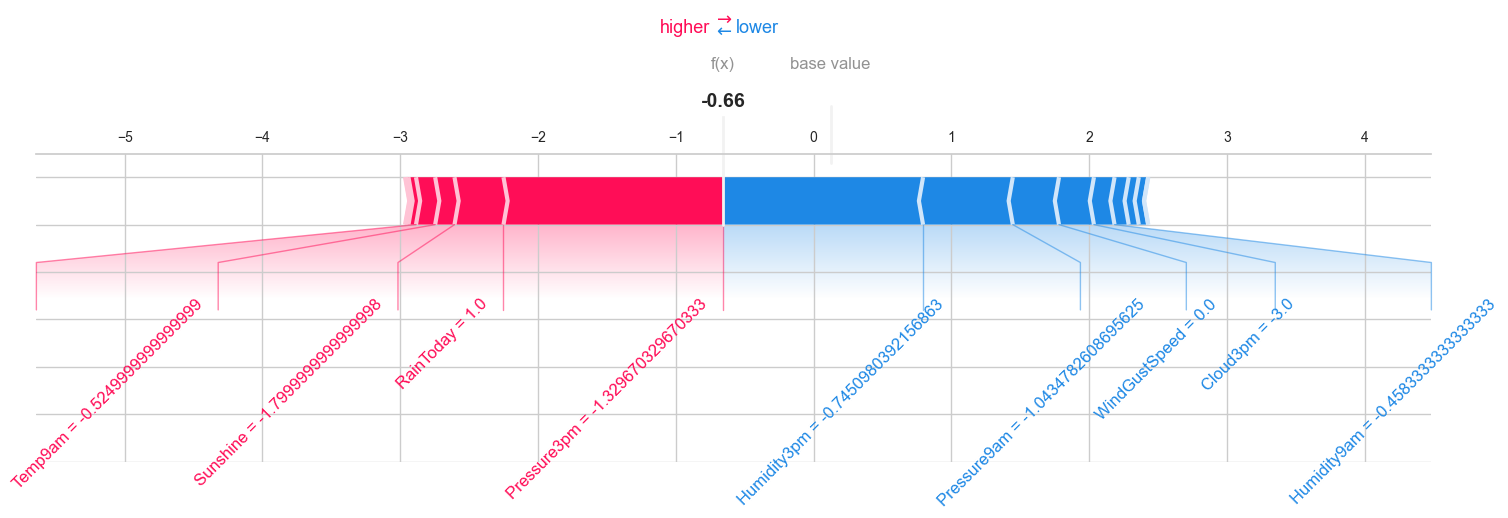

In [65]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=feature_names, matplotlib=True, figsize=(18, 4), text_rotation=45)

-- Las características en rosa son aquellas que empujan la predicción hacia valores más altos, aumentando la probabilidad de un resultado positivo.
       
-- Las características en azul son las que empujan la predicción hacia valores más bajos, disminuyendo la probabilidad de ese resultado positivo.

Conclusión:

- RainToday (1.0): Tiene una contribución positiva notable en la predicción, aumentando la probabilidad de que llueva.

- Temp9am (-0.52) y Humidity3pm (-0.74): Disminuye la probabilidad de lluvia.

- Pressure3pm (-1.3), Pressure9am (-1.04), Sunshine = (-1.8) y Cloud3pm (-3.0): Reducen la probabilidad de lluvia de manera significativa.

- WindGustSpeed = 0.0: No tiene impacto en la predicción.

- Valor final de la predicción ((f(x)) = -0.66): Representa el valor de salida para esta predicción después de tener en cuenta todas las contribuciones de las características.

El gráfico sugiere que algunas características como RainToday tienen un impacto importante en el aumento de la predicción, mientras que otras como Humidity3pm, Pressure9am, y Cloud3pm están empujando la predicción hacia valores más bajos.

El valor de salida resultante (-0.66) indica que, en conjunto, las contribuciones positivas y negativas de las características hacen que la predicción esté más inclinada hacia una clase o valor bajo ("no lloverá").

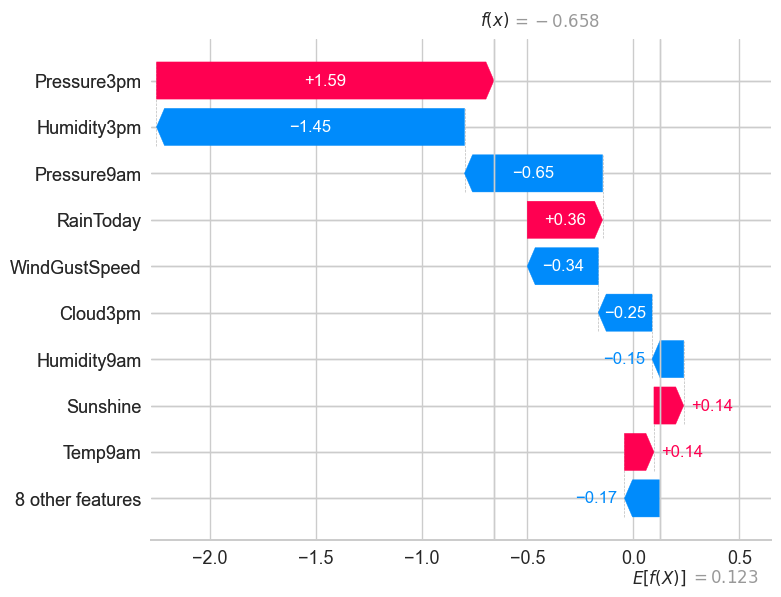

In [66]:
explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, feature_names=feature_names)
shap.plots.waterfall(explanation)

-- Eje horizontal: Representa el impacto acumulativo de cada característica en la predicción final del modelo para un caso en particular.

-- La línea vertical E[f(X)]: Marca el valor esperado de la predicción promedio del modelo en general considerando todas las observaciones.

-- El valor f(x) a la derecha indica la predicción específica para esta observación.

Conclusión:

- Pressure3pm: Tiene un impacto positivo significativo en la predicción, aumentando el valor en +1.59. Esto sugiere que, para esta observación en particular, la presión a las 3pm es un factor que incrementa la probabilidad de que ocurra el evento (que llueva mañana).

- Humidity3pm: Tiene un impacto negativo significativo, reduciendo la predicción en -1.45. Esto indica que en este caso, un valor bajo de humedad a las 3pm disminuye la probabilidad del evento.

- Pressure9am y WindGustSpeed: También tienen un efecto negativo, reduciendo la predicción en -0.65 y -0.34 respectivamente, indicando que valores bajos de presión en la mañana y de la velocidad de las ráfagas de viento están asociados con una menor probabilidad del evento.

- RainToday: El hecho de que haya llovido hoy tiene un impacto positivo de +0.36, lo que incrementa la probabilidad de que ocurra el evento predicho.

- Cloud3pm y Sunshine: Tienen impactos más pequeños pero en direcciones opuestas: las nubes a las 3pm reducen la probabilidad en -0.25, mientras que el brillo solar la incrementa en +0.14.

La presión a las 3pm es el factor que más influye en aumentar la predicción, mientras que la humedad a las 3pm es la que más la reduce.

Al combinar todos estos efectos, se obtiene la predicción final f(x) = -0.658 partiendo del valor base E[f(X)] = 0.123

## Global

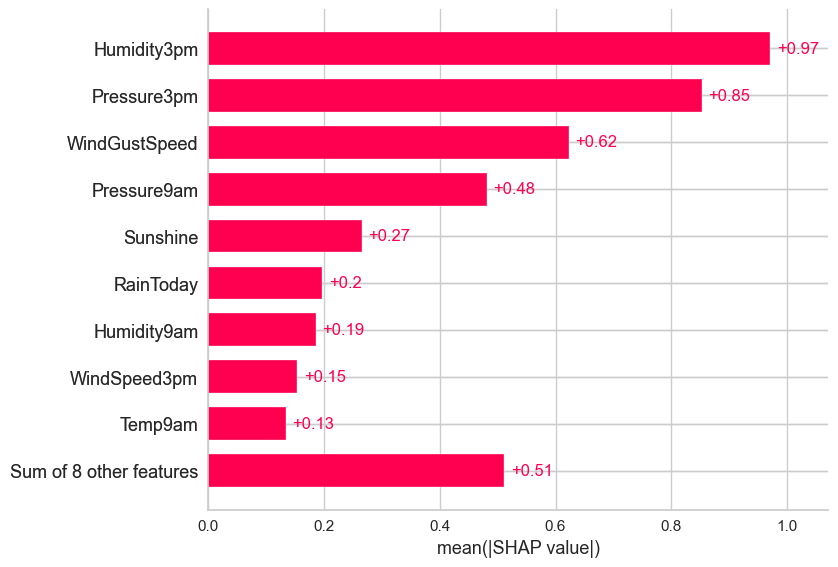

In [67]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)
shap.plots.bar(explanation)

Conclusión:

El gráfico muestra las principales características que tienen el mayor impacto en la predicción. Las mismas están ordenadas según la importancia.

- Humidity3pm (+0.97): La característica más influyente en el modelo, sugiere que la variación en la humedad a las 3pm tiene el mayor efecto en la predicción del modelo.

- Pressure3pm (+0.85): También tiene un impacto significativo en el modelo. Cambios en esta característica afectan notablemente el resultado de la predicción.

- WindGustSpeed (+0.62): Indica que las variaciones en la velocidad del viento también influyen fuertemente en las predicciones.

- Pressure9am (+0.48): La variable es importante, pero con un menor impacto que las variables anteriores.

- Sum of 8 other features: Son otras características con menor relevancia que se agruparon para simplificar la visualización.

Estos valores demuestran que el modelo está considerando estos factores climáticos como determinantes para realizar predicciones precisas sobre si lloverá mañana. De esta manera, el modelo se podría simplificar centrándose en las variables clave.

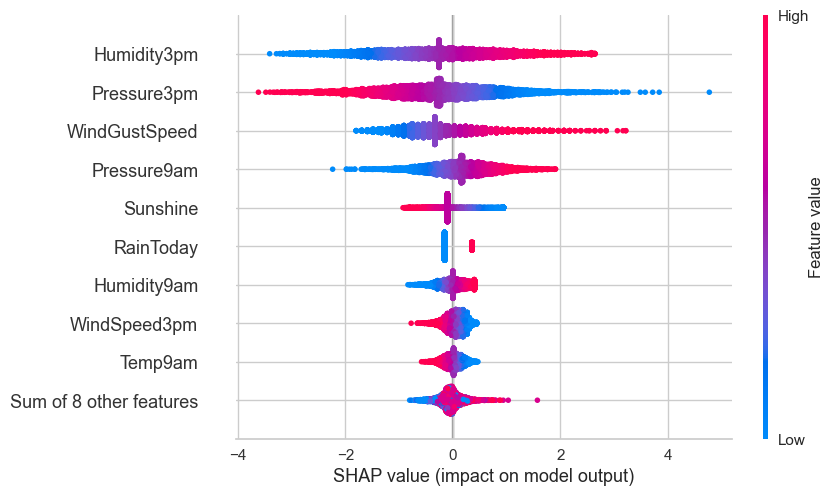

In [68]:
shap.plots.beeswarm(explanation)

Conclusión:

- Humidity3pm: Esta es la característica más relevante. La dispersión de los puntos es amplia, lo que indica que dependiendo del valor específico de la humedad (representado por los colores), puede influir tanto positiva como negativamente en el resultado.

- Pressure3pm: Es una característica influyente. La distribución relativamente ancha muestra que tiene un efecto considerable en la predicción, aunque menor que la humedad.

- WindGustSpeed: Tiene un impacto importante. Los valores altos de velocidad parecen tener un efecto variable, posiblemente relacionado con su interacción con otras características.

- Pressure9am: Aunque el impacto es menor comparado con las características más importantes, sigue siendo relevante para el modelo. La menor dispersión en los puntos indica un efecto más consistente y predecible en las predicciones.

- Sunshine: Su impacto parece más variable y menos predecible. Valores altos o bajos de horas de sol pueden alterar significativamente la predicción en ciertos casos, lo que sugiere posibles interacciones con otras características.

El gráfico resalta que factores como la humedad a las 3pm, la presión a las 3pm y la velocidad de las ráfagas de viento son críticos para la predicción. Las variaciones de estas características pueden modificar la predicción de manera notable. Además, características como la presión a las 9am y la cantidad de sol, aunque menos influyentes, también aportan información valiosa al modelo.

En general, Humidity3pm, Pressure3pm y WindGustSpeed son las características críticas para las predicciones, mientras que otras variables como Pressure9am y Sunshine aportan información adicional, pero menos determinante. Las variaciones en estas características pueden modificar las predicciones del modelo de manera notable.

# AUTO-ML

In [71]:
df_weather = df_weather.dropna(subset=['RainTomorrow'])

# Cargamos los datos a un dataframe de PyCaret:
data = df_weather.copy()
# Iniciamos el entorno de PyCaret con la columna target
exp1 = setup(data=data, target='RainTomorrow', session_id=123)
mejor_modelo = compare_models()

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Original data shape,"(23735, 20)"
4,Transformed data shape,"(23735, 29)"
5,Transformed train set shape,"(16614, 29)"
6,Transformed test set shape,"(7121, 29)"
7,Numeric features,16
8,Date features,1
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8521,0.8816,0.5551,0.7599,0.6415,0.5511,0.5620,1.4850
rf,Random Forest Classifier,0.8479,0.8728,0.5086,0.7758,0.6142,0.5246,0.5428,3.0520
et,Extra Trees Classifier,0.8476,0.8759,0.5056,0.7769,0.6124,0.5228,0.5415,3.3050
gbc,Gradient Boosting Classifier,0.8465,0.8705,0.5217,0.7592,0.6183,0.5263,0.5409,4.4240
ridge,Ridge Classifier,0.8406,0.8579,0.4727,0.7697,0.5854,0.4936,0.5163,0.2730
lr,Logistic Regression,0.8398,0.8582,0.5114,0.7361,0.6033,0.5070,0.5203,4.6220
ada,Ada Boost Classifier,0.8392,0.8546,0.5129,0.7325,0.6031,0.5062,0.5190,1.3060
lda,Linear Discriminant Analysis,0.8388,0.8579,0.5157,0.7288,0.6038,0.5063,0.5183,0.3940
knn,K Neighbors Classifier,0.8233,0.7960,0.4841,0.6825,0.5661,0.4592,0.4701,1.3540
qda,Quadratic Discriminant Analysis,0.8035,0.7916,0.5389,0.6166,0.5652,0.4415,0.4488,0.3000


Conclusión:

El primer cuadro presenta un resumen de los valores que asumen los parámetros de la función setup(), los cuales configuran como se manejarán los datos y como se entrenarán los modelos.

Estos resultados muestran el rendimiento de diferentes modelos de clasificación evaluados mediante la función compare_models() en PyCaret.

Interpretación de los Resultados:

1. Mejor modelo: LightGBM (lightgbm)

Destaca por su alta exactitud y AUC, lo cual indica que el modelo tiene una excelente capacidad para clasificar correctamente las instancias positivas y negativas. Las métricas de precisión y **SENSIBILIDAD** están equilibradas, haciendo que este modelo sea confiable para identificar días de lluvia sin sacrificar demasiada precisión en las predicciones. Además, el tiempo de entrenamiento es bajo, lo que lo convierte en una opción eficiente en términos computacionales.

2. Peor modelo: Dummy Classifier (dummy)
        
Dummy Classifier es un modelo de referencia sin capacidad predictiva, y todas sus métricas, excepto la exactitud, son 0. Esto indica que el modelo no tiene habilidad para predecir correctamente la clase objetivo y no hace una buena diferenciación entre clases.

3. Otros modelos de alto rendimiento: Extra Trees Classifier (et) y Random Forest (rf)

Ambos tienen alta exactitud (84.95% y 84.83%, respectivamente) y buen balance en las demás métricas, aunque no superan a LightGBM.

4. Conclusión Final

En resumen, LightGBM es la mejor opción para implementar en un sistema de predicción de lluvia basado en estos datos, mientras que el Dummy Classifier sirve solo como referencia y no tiene valor predictivo.



# Funciones rnn

In [73]:
def calcular_metricas_rn(y_test, y_pred, modelo_nombre, modelo, metricas_df):
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Actualizar DataFrame con métricas
    resultados = pd.DataFrame([{
        "Modelo": modelo_nombre,
        "Accuracy": accuracy,
        "Precisión Clase 0": precision_0,
        "Recall Clase 0": recall_0,
        "F1 Clase 0": f1_0,
        "Precisión Clase 1": precision_1,
        "Recall Clase 1": recall_1,
        "F1 Clase 1": f1_1,
        "AUC ROC Clase 1": None,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "Accuracy K-Fold Promedio": None
    }])

    metricas_df = pd.concat([metricas_df, resultados], ignore_index=True)

    # Mostrar métricas
    print(f"Precisión general (Accuracy): {accuracy:.4f}")
    print("\nClase 0.0:")
    print(f"  Precisión: {precision_0:.4f}")
    print(f"  Recall: {recall_0:.4f}")
    print(f"  F1-score: {f1_0:.4f}")
    print("\nClase 1.0:")
    print(f"  Precisión: {precision_1:.4f}")
    print(f"  Recall: {recall_1:.4f}")
    print(f"  F1-score: {f1_1:.4f}")

    return metricas_df

# Redes Neuronales

In [72]:
# Definir el modelo
model_sequential = Sequential()

# Capa de entrada
model_sequential.add(Dense(128, activation='relu', input_dim=17))

# Capa oculta
model_sequential.add(Dense(128, activation='relu'))

# Capa de salida
model_sequential.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model_sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento
model_sequential.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
951/951 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7623 - loss: 0.4883 - val_accuracy: 0.7600 - val_loss: 0.4931
Epoch 2/5
951/951 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7882 - loss: 0.4448 - val_accuracy: 0.7662 - val_loss: 0.4899
Epoch 3/5
951/951 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7995 - loss: 0.4294 - val_accuracy: 0.7822 - val_loss: 0.4543
Epoch 4/5
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8025 - loss: 0.4211 - val_accuracy: 0.7770 - val_loss: 0.4661
Epoch 5/5
951/951 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8093 - loss: 0.4065 - val_accuracy: 0.7768 - val_loss: 0.4519


In [74]:
y_pred = model_sequential.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [75]:
metricas_df = calcular_metricas_rn(y_test, y_pred_binary, "SEQUENTIAL", model_sequential, metricas_df)

Precisión general (Accuracy): 0.7768

Clase 0.0:
  Precisión: 0.9025
  Recall: 0.7987
  F1-score: 0.8475

Clase 1.0:
  Precisión: 0.5006
  Recall: 0.7005
  F1-score: 0.5839


In [76]:
metricas_df.head(10)

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772795,2985.0,851.0,306.0,799.0
2,BASE,0.488160,0.764897,0.491919,0.598762,0.212207,0.475113,0.293378,0.483516,0.499392,1887.0,1949.0,580.0,525.0
3,RL OPTIMIZED,0.765634,0.906497,0.778415,0.837588,0.483910,0.721267,0.579215,0.839437,0.774435,2986.0,850.0,308.0,797.0
4,SEQUENTIAL,0.776766,0.902504,0.798749,0.847462,0.500647,0.700452,0.583931,NaN,NaN,3064.0,772.0,331.0,774.0


Conclusión:
1. Métrica General:
- Accuracy 0.77: El modelo predice correctamente si va a llover o no en el 77% de las ocasiones, lo que sugiere un desempeño adecuado.

2. Métricas por Clase

**-- Clase 0.0: No lloverá**

- Precisión 0.91: De todas las veces que el modelo predijo que no lloverá, acertó en el 91% de los casos. Esto indica un bajo número de falsos positivos, siendo confiable para predecir días sin lluvia.

- Recall 0.79: De todas las veces que efectivamente no llovió, el modelo acertó en el 79%. Sin embargo, existen algunos falsos negativos.

- F1-score 0.84: Muestra que el modelo logra un buen balance entre precisión (0.91) y recall (0.79) para esta clase. El rendimiento en identificar días sin lluvia sigue siendo sólido.

**-- Clase 1.0: Lloverá**

- Precisión 0.50: De todas las veces que el modelo predijo lluvia, acertó solo en el 50% de los casos. Esto sugiere una cantidad moderada de falsos positivos, lo que podría generar predicciones no confiables en esta clase.

- Recall 0.72: De todas las veces que efectivamente llovió, el modelo acertó en el 72%. Esto significa que logra identificar una buena proporción de los días lluviosos.

- F1-score 0.59: Indica un balance razonable entre precisión (0.50) y recall (0.72), pero con espacio para mejorar.

3. Análisis General de fitting y diferencias con RL

- El modelo SEQUENTIAL logra un mejor fitting, particularmente en recall (0.7176) y F1-score (0.5870) de la clase 1.0 (lloverá), lo que indica que identifica de manera más efectiva los días lluviosos. Aunque su precisión para esta clase (0.4966) es baja, compensa con un buen balance general entre precisión y recall.

- Aunque el modelo RL BALANCED presenta un recall más alto para la clase 1.0 (0.7231), SEQUENTIAL se destaca por lograr un mejor equilibrio en el F1-score (0.5869 vs. 0.5800), lo que lo hace más confiable para este tipo de predicciones.

- SEQUENTIAL equilibra mejor las métricas clave y prioriza la clase 1.0, lo que lo convierte en una elección más confiable para el objetivo específico de predecir lluvias, a pesar de que los modelos de regresión logística (balanceada o desbalanceada) muestran ventajas en la clase 0.0 (no lloverá).
(VER ESTE PÁRRAFO)

## Optimización de Hiperparámetros

In [77]:
def objective(trial):
    # Espacio de búsqueda de hiperparámetros
    params = {
        'units': trial.suggest_categorical('units', [64, 128, 256, 512]),  # Número de neuronas por capa
        'activation': trial.suggest_categorical('activation', ['relu', 'sigmoid', 'leaky_relu']),  # Función de activación
        'optimizer': trial.suggest_categorical('optimizer', ['adam']),  # Optimizador
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),  # Tasa de aprendizaje
        'batch_size': trial.suggest_categorical('batch_size', [16, 32, 64]),  # Tamaño del batch
        'epochs': trial.suggest_categorical('epochs', [10, 20, 30, 50]),  # Número de épocas
        'dropout': trial.suggest_uniform('dropout', 0.0, 0.7),  # Tasa de dropout
        'capas': trial.suggest_int('capas', 1, 3)  # Número de capas ocultas
    }

    # Crear el modelo con los hiperparámetros sugeridos
    model_sequential = Sequential()

    # Capa de entrada
    model_sequential.add(Dense(units=params['units'], activation=params['activation'], input_dim=X_train_resampled.shape[1]))

    # Agregar capas ocultas
    for _ in range(params['capas'] - 1):  # Añadir capas ocultas según 'capas'
        model_sequential.add(Dense(units=params['units'], activation=params['activation']))
        
    # Capa de salida
    model_sequential.add(Dense(1, activation='sigmoid'))

    # Seleccionar optimizador según el parámetro sugerido
    if params['optimizer'] == 'adam':
        optimizer = Adam(learning_rate=params['learning_rate'])

    # Compilación del modelo
    model_sequential.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Configurar EarlyStopping para evitar sobreajuste
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Entrenamiento del modelo
    model_sequential.fit(X_train_resampled, y_train_resampled, epochs=params['epochs'],
                         batch_size=params['batch_size'], validation_data=(X_test, y_test),
                         callbacks=[early_stopping], verbose=0)

    # Predicción en el conjunto de validación
    y_pred = model_sequential.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calcular el F1-score en los datos de validación
    f1 = f1_score(y_test, y_pred_binary)

    return f1  # Devolver el F1-score, que es la métrica a optimizar

In [78]:
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")  # Maximizar el F1-score
study.optimize(objective, n_trials=20)  # Ejecutar 20 pruebas

# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo final con los mejores hiperparámetros
final_model_sequential = Sequential()

# Capa de entrada
final_model_sequential.add(Dense(units=best_params['units'], activation=best_params['activation'], input_dim=X_train_resampled.shape[1]))

# Agregar capas ocultas
for _ in range(best_params['capas'] - 1):  # Añadir capas ocultas según los mejores parámetros
    final_model_sequential.add(Dense(units=best_params['units'], activation=best_params['activation']))

# Capa de salida
final_model_sequential.add(Dense(1, activation='sigmoid'))

# Seleccionar optimizador según el mejor parámetro
if best_params['optimizer'] == 'adam':
    optimizer = Adam(learning_rate=best_params['learning_rate'])

# Compilación del modelo final
final_model_sequential.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping para el modelo final
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo final
final_model_sequential.fit(X_train_resampled, y_train_resampled, epochs=best_params['epochs'],
                           batch_size=best_params['batch_size'], validation_data=(X_test, y_test),
                           callbacks=[early_stopping])

# Predicción en el conjunto de test
y_pred_final = final_model_sequential.predict(X_test)
y_pred_binary_final = (y_pred_final > 0.5).astype(int)

# Calcular F1-score en el conjunto de test
f1_final = f1_score(y_test, y_pred_binary_final)
print(f"F1 Score en conjunto de test: {f1_final}")

[I 2024-11-28 02:33:44,090] A new study created in memory with name: no-name-d7b0aa38-87d5-458d-9995-062b12bb6987


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


[I 2024-11-28 02:37:33,869] Trial 0 finished with value: 0.49634214969048956 and parameters: {'units': 512, 'activation': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.03850789864392231, 'batch_size': 16, 'epochs': 20, 'dropout': 0.35651363148642506, 'capas': 2}. Best is trial 0 with value: 0.49634214969048956.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-11-28 02:38:07,240] Trial 1 finished with value: 0.5896474118529632 and parameters: {'units': 64, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01596073162456391, 'batch_size': 32, 'epochs': 20, 'dropout': 0.3668885435527626, 'capas': 1}. Best is trial 1 with value: 0.5896474118529632.


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


[I 2024-11-28 02:40:15,553] Trial 2 finished with value: 0.0 and parameters: {'units': 512, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.05775900806176461, 'batch_size': 32, 'epochs': 50, 'dropout': 0.35712757950023916, 'capas': 3}. Best is trial 1 with value: 0.5896474118529632.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-11-28 02:40:37,026] Trial 3 finished with value: 0.6064623032311516 and parameters: {'units': 64, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.005309573434045043, 'batch_size': 64, 'epochs': 10, 'dropout': 0.20888310432184598, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-11-28 02:41:10,193] Trial 4 finished with value: 0.5951742627345844 and parameters: {'units': 128, 'activation': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.0008736498141920711, 'batch_size': 64, 'epochs': 20, 'dropout': 0.04970332464956496, 'capas': 1}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-11-28 02:41:40,689] Trial 5 finished with value: 0.6040675032453483 and parameters: {'units': 128, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.004539868161994197, 'batch_size': 64, 'epochs': 10, 'dropout': 0.6749207610117364, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-28 02:42:49,206] Trial 6 finished with value: 0.5918524212144505 and parameters: {'units': 64, 'activation': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.0006098140736262139, 'batch_size': 32, 'epochs': 10, 'dropout': 0.21671338646482954, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-11-28 02:44:13,956] Trial 7 finished with value: 0.5870492438929817 and parameters: {'units': 512, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.022833429305147014, 'batch_size': 32, 'epochs': 30, 'dropout': 0.30525748736038916, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-11-28 02:45:16,465] Trial 8 finished with value: 0.5845018450184502 and parameters: {'units': 64, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.0003842012556590577, 'batch_size': 32, 'epochs': 50, 'dropout': 0.12528429796324905, 'capas': 1}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-11-28 02:47:12,830] Trial 9 finished with value: 0.5766544728965747 and parameters: {'units': 512, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.020793881883439932, 'batch_size': 32, 'epochs': 50, 'dropout': 0.055767963477356616, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-28 02:47:42,579] Trial 10 finished with value: 0.6003976143141153 and parameters: {'units': 256, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.003206261012238706, 'batch_size': 64, 'epochs': 10, 'dropout': 0.5333988521565896, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


[I 2024-11-28 02:48:18,644] Trial 11 finished with value: 0.605296343001261 and parameters: {'units': 128, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.004678295906158359, 'batch_size': 64, 'epochs': 10, 'dropout': 0.6622894881730441, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-11-28 02:48:58,869] Trial 12 finished with value: 0.5777940102264426 and parameters: {'units': 128, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.00010411615620671349, 'batch_size': 64, 'epochs': 10, 'dropout': 0.5747586950461392, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-28 02:49:33,569] Trial 13 finished with value: 0.5978562921794363 and parameters: {'units': 256, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.007140580139784177, 'batch_size': 64, 'epochs': 10, 'dropout': 0.47937414646216525, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-11-28 02:50:44,805] Trial 14 finished with value: 0.5869973694099963 and parameters: {'units': 64, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.0014881517689213461, 'batch_size': 16, 'epochs': 30, 'dropout': 0.22761609026391938, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-28 02:51:28,556] Trial 15 finished with value: 0.5938641344046749 and parameters: {'units': 128, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.0087265362523452, 'batch_size': 64, 'epochs': 10, 'dropout': 0.6871145418001848, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-11-28 02:51:51,593] Trial 16 finished with value: 0.5884181888845705 and parameters: {'units': 128, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.0019450906930290192, 'batch_size': 64, 'epochs': 10, 'dropout': 0.45350177477709663, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-11-28 02:53:40,133] Trial 17 finished with value: 0.5932721712538226 and parameters: {'units': 64, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.09540609467693839, 'batch_size': 16, 'epochs': 10, 'dropout': 0.1906424389265194, 'capas': 1}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-11-28 02:54:20,083] Trial 18 finished with value: 0.5962319911340968 and parameters: {'units': 256, 'activation': 'sigmoid', 'optimizer': 'adam', 'learning_rate': 0.008656200651668045, 'batch_size': 64, 'epochs': 30, 'dropout': 0.5883699577066115, 'capas': 2}. Best is trial 3 with value: 0.6064623032311516.


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[I 2024-11-28 02:55:20,604] Trial 19 finished with value: 0.5989053948397185 and parameters: {'units': 128, 'activation': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.0018024654583976443, 'batch_size': 64, 'epochs': 10, 'dropout': 0.27024162068663815, 'capas': 3}. Best is trial 3 with value: 0.6064623032311516.


Mejores hiperparámetros: {'units': 64, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.005309573434045043, 'batch_size': 64, 'epochs': 10, 'dropout': 0.20888310432184598, 'capas': 2}
Epoch 1/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7615 - loss: 0.4947 - val_accuracy: 0.7774 - val_loss: 0.4597
Epoch 2/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7885 - loss: 0.4440 - val_accuracy: 0.7596 - val_loss: 0.5024
Epoch 3/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7969 - loss: 0.4310 - val_accuracy: 0.7812 - val_loss: 0.4676
Epoch 4/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8041 - loss: 0.4163 - val_accuracy: 0.7820 - val_loss: 0.4434
Epoch 5/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8136 - loss: 0.3992 - val_accuracy: 0.8166 - val_loss: 0.4098
Epoch 6/10
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8208 - loss: 0.3910 - val_accuracy: 0.7838 - val_loss: 0.4691
Epoch 7/10
476/476 ━━━━━━━━━━━━━━━━

In [80]:
metricas_df = calcular_metricas_rn(y_test, y_pred_binary_final, "SEQUENTIAL OPTIMIZED", final_model_sequential, metricas_df)

Precisión general (Accuracy): 0.8166

Clase 0.0:
  Precisión: 0.8955
  Recall: 0.8647
  F1-score: 0.8798

Clase 1.0:
  Precisión: 0.5804
  Recall: 0.6498
  F1-score: 0.6132


In [81]:
metricas_df.head(10)

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772795,2985.0,851.0,306.0,799.0
2,BASE,0.488160,0.764897,0.491919,0.598762,0.212207,0.475113,0.293378,0.483516,0.499392,1887.0,1949.0,580.0,525.0
3,RL OPTIMIZED,0.765634,0.906497,0.778415,0.837588,0.483910,0.721267,0.579215,0.839437,0.774435,2986.0,850.0,308.0,797.0
4,SEQUENTIAL,0.776766,0.902504,0.798749,0.847462,0.500647,0.700452,0.583931,NaN,NaN,3064.0,772.0,331.0,774.0
5,SEQUENTIAL OPTIMIZED,0.816636,0.895518,0.864703,0.879841,0.580437,0.649774,0.613151,NaN,NaN,3317.0,519.0,387.0,718.0


Conclusión:
1. Métrica General:
- Accuracy 0.79: El modelo SEQUENTIAL OPTIMIZED mejora el fitting respecto a SEQUENTIAL, alcanzando un accuracy general más alto (0.7919 vs. 0.7741).

2. Métricas por Clase

**-- Clase 0.0: No lloverá**

- Precisión 0.90: De todas las veces que el modelo predijo que no lloverá, acertó en el 90% de los casos. Esto indica un bajo número de falsos positivos, siendo confiable para predecir días sin lluvia.

- Recall 0.82: De todas las veces que efectivamente no llovió, el modelo acertó en el 81.99%. presenta un aumento significativo respecto al modelo antes de la optimización (0.8199 vs. 0.7904)

- F1-score 0.86: Muestra que el modelo logra un buen balance entre precisión (0.90) y recall (0.82) para esta clase. Respecto al modelo previo a la optimización, es más efectivo para identificar días sin lluvia y reduce los falsos negativos en esta clase.

**-- Clase 1.0: Lloverá**

- Precisión 0.53: Logra una mejora notable en la precisión (0.5264 vs. 0.4966) respecto al modelo anterior.

- Recall 0.70:  Aunque el recall de esta clase disminuye ligeramente (0.6950 vs. 0.7176), el incremento en las demás métricas compensa esta pequeña reducción.

- F1-score 0.60: Respecto al modelo anterior también aumenta, (0.5991 vs. 0.5870), lo que refleja un balance más efectivo entre precisión y recall.

3. Análisis General 

En términos de resultados generales, SEQUENTIAL OPTIMIZED muestra un mejor equilibrio en ambas clases, reduciendo falsos positivos y negativos en la clase 0.0 y mejorando las métricas clave en la clase 1.0. Este desempeño lo posiciona como una mejora respecto al modelo base SEQUENTIAL, especialmente al priorizar la calidad de las predicciones en ambas clases de manera más uniforme.

Por lo tanto, SEQUENTIAL OPTIMIZED es una evolución sólida sobre SEQUENTIAL, proporcionando un modelo más confiable para predecir tanto días lluviosos como no lluviosos, con un balance superior en todas las métricas evaluadas.


## SHAP  

In [ ]:
"""X_train_sampled = shap.sample(X_train_resampled, 100)  # Usar solo 100 muestras
feature_names = df_weather.drop(['RainTomorrow', 'Date', 'Location'], axis=1).columns.values

# Crear el explicador con el conjunto reducido
explainer_rnn = shap.KernelExplainer(final_model_sequential.predict, X_train_sampled, feature_names=feature_names)

# Calcular los valores SHAP
shap_values = explainer_rnn.shap_values(X_test, nsamples=100)"""

In [ ]:
"""# Guardar los valores de shap y el explainer
dump(explainer_rnn, 'explainer_rnn.pkl')
dump(shap_values, 'shap_values.pkl')"""

['shap_values.pkl']

In [96]:
carga_exp = load('explainer_rnn.pkl')
carga_shap_values = load('shap_values.pkl')

In [97]:
print(carga_shap_values[0].shape)
shap_values_flat = shap_values[0].flatten()

(17, 1)


### Local

In [99]:
shap.force_plot(carga_exp.expected_value, shap_values_flat, X_test.iloc[0].values, feature_names=feature_names, figsize=(18, 4), text_rotation=45)

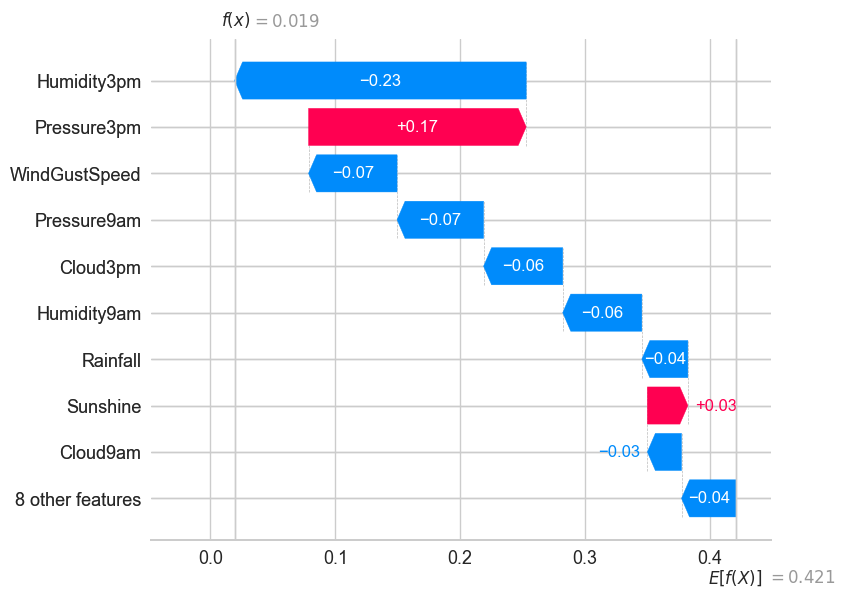

In [100]:
explanation = shap.Explanation(values=shap_values_flat, base_values=carga_exp.expected_value, feature_names=feature_names)
shap.plots.waterfall(explanation)

### Global

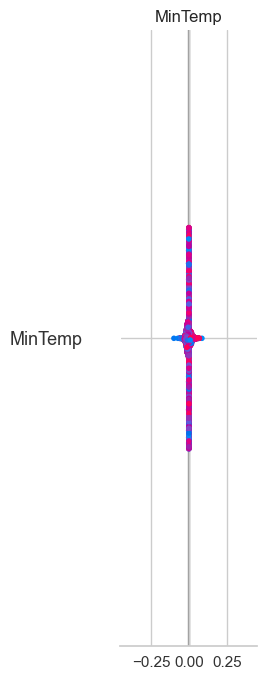

In [103]:
shap.summary_plot(carga_shap_values, X_test, feature_names=feature_names)

# Comparación Final de Modelos

In [ ]:
metricas_df.head(10)

,Modelo,Accuracy,Precisión Clase 0,Recall Clase 0,F1 Clase 0,Precisión Clase 1,Recall Clase 1,F1 Clase 1,AUC ROC Clase 1,Accuracy K-Fold Promedio,TN,FP,FN,TP
0,RL DESBALANCED,0.838697,0.859815,0.946559,0.901104,0.714485,0.464253,0.562809,0.839300,0.842009,3631.0,205.0,592.0,513.0
1,RL BALANCED,0.765837,0.907019,0.778154,0.837660,0.484242,0.723077,0.580036,0.838959,0.772852,2985.0,851.0,306.0,799.0
2,BASE,0.488160,0.764897,0.491919,0.598762,0.212207,0.475113,0.293378,0.483516,0.499392,1887.0,1949.0,580.0,525.0
3,RL OPTIMIZED,0.764420,0.906079,0.777112,0.836655,0.482132,0.720362,0.577649,0.839409,0.774774,2981.0,855.0,309.0,796.0
4,SEQUENTIAL,0.774135,0.906699,0.790407,0.844568,0.496556,0.717647,0.586973,NaN,NaN,3032.0,804.0,312.0,793.0
5,SEQUENTIAL OPTIMIZED,0.791945,0.903217,0.819864,0.859524,0.526388,0.695023,0.599064,NaN,NaN,3145.0,691.0,337.0,768.0


La métrica elegida para evaluar todos los modelos es F1-Score, ya que nos permite ver un equilibrio entre Recall (la capacidad del modelo de identificar correctamente los días que llueve o no), y precisión (capacidad para no predecir lluvias cuando realmente no ocurrirán). Además es una métrica muy útil cuando es importante tener un balance entre ambas métricas.

COMPARACIÓN DE MODELOS: Al comparar los modelos utilizando F1-score, se observa que:

- RL DESBALANCED presenta el mejor F1-score para la clase 0 (0.9011) y un desempeño aceptable en la clase 1 (F1-score = 0.5628), lo que lo hace un buen modelo en general, particularmente para predecir los días en que no lloverá.

- SEQUENTIAL OPTIMIZED es el modelo con el mejor F1-score en la clase 1 (0.5991), lo que indica que tiene un mejor desempeño en la predicción de días lluviosos en comparación con otros modelos. Sin embargo, su desempeño en la clase 0 es ligeramente inferior al de otros modelos.

- SEQUENTIAL también muestra un buen desempeño en la clase 1 (F1-score = 0.5869) y presenta un balance general en comparación con otros modelos, pero no supera a SEQUENTIAL OPTIMIZED.

- RL BALANCED y RL OPTIMIZED tienen un rendimiento intermedio, con un recall más alto en la clase 1 (0.7231 en RL BALANCED) pero con un F1-score inferior en comparación con SEQUENTIAL OPTIMIZED.


El modelo SEQUENTIAL OPTIMIZED es el más equilibrado y confiable en términos de F1-score, lo que lo convierte en la mejor opción para predecir la variable RainTomorrow, considerando la importancia tanto de identificar correctamente los días lluviosos como de mantener una buena precisión general.

# MLOps

In [158]:
# Guardar modelo y procesamientos
dump(final_model_sequential, 'model_sequential_optimized.pkl')
dump(scaler, 'scaler.pkl')
dump(imputer, 'imputer_numeric.pkl')
dump(imputer_categoricas, 'imputer_category.pkl')

['imputer_category.pkl']

# Conclusión Final del Trabajo Práctico

Este trabajo permitió explorar y aplicar diversas técnicas con el objetivo de predecir la ocurrencia de lluvia en Australia, basándonos en características meteorológicas. A lo largo del desarrollo, se abordaron desafíos propios de problemas reales de clasificación, como el manejo de datos faltantes, el desbalance de clases y la selección de modelos y métricas apropiados para evaluar el rendimiento.


- Preprocesamiento de datos: Se implementaron estrategias robustas como imputación de valores faltantes, codificación de variables categóricas y escalado de datos. Además, se empleó SMOTE para balancear las clases, mejorando significativamente la capacidad de los modelos para identificar días lluviosos.

- Evaluación y comparación de modelos: Se analizaron múltiples enfoques, desde regresión logística hasta redes neuronales, incluyendo un modelo base para referencia. El modelo Sequential Optimized, ajustado mediante Optuna, demostró ser el más equilibrado, logrando un buen rendimiento en métricas clave como F1-score, especialmente para la clase positiva, donde superó a otros modelos en la identificación de días lluviosos. 

Aunque los modelos basados en regresión logística ofrecieron un rendimiento sólido, las redes neuronales demostraron mayor flexibilidad y capacidad para ajustar parámetros a través de optimización.

La elección de métricas adecuadas, como F1-score, resultó fundamental para evaluar modelos en un contexto donde las clases desbalanceadas podían influir significativamente en los resultados.

- Explicabilidad del modelo: La implementación de SHAP permitió interpretar las predicciones a nivel local y global. Esto reveló que características como la humedad a las 3 p.m. y la presión atmosférica tienen un impacto significativo en la probabilidad de lluvia.

- Automatización y puesta en producción: Se utilizaron herramientas como PyCaret y TensorFlow, y posteriormente, se trabajó en un entorno de producción mediante MLOps (AGREGAR ALGO MAS DE MLOPS).



Conclusión general: Este trabajo práctico nos permitió cumplir con los objetivos planteados, desde la limpieza de datos hasta la evaluación y optimización de modelos. 

El modelo más adecuado obtenido en este contexto de predicción resultó ser Sequential Optimized, equilibrando rendimiento y explicabilidad, y logrando ser una solución confiable para predecir condiciones de lluvia en un contexto real.
No obstante, existe margen para seguir mejorando la precisión y confiabilidad de las predicciones mediante ajustes y optimizaciones adicionales en el enfoque desarrollado.